<a href="https://colab.research.google.com/github/Nuriam81/Proyecto-Final-Data-Science-Nuria-Munarriz/blob/main/Proyecto_Final_Colab_Data_Science_Nuria_Munarriz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK DE MATERIALES**

**MODELO DE NEGOCIO**

En este caso se establece un modelo al que se aplica para un problema es de Análisis Predictivo, supervisado, Problema de regresion lineal multiple

**CONTEXTO EMPRESARIAL**

El analisis se centra en una empresa eléctrica que debe brindar el servicio de energía, para ello la red debe estar en condiciones, por lo que la empresa debe tener los recursos, materiales, para asegurar el correcto funcionamiento de la red.

La empresa necesita saber como se compone su capital de materiales, tanto valuados monetariamente como en cantidades, pero lo más importante es conocer la cobertura física de sus distintas matrículas

**OBJETIVO**

El departamento de Abastecimiento y logísctica de la empresa, ha solicitado la ayuda de un Data Science ya que necesita conocer los materiales y la importancia de los mismos para lograr que la empresa pueda brindar el sevicio a sus usuarios.

Debemos construir un modelo de ML utilizando algoritmos de Regresión para predecir la caobertura física de los distintos materiales de acuerdo a su stock, consumo y reservas.

**HIPOTESIS**

¿Puede el data set proporcionado por la empresa eléctrica proporcionar información sobre los materiales que posee la empresa?

¿ Es posible conocer que grupo de materiales posee en mayor medida la empresa? ¿ Y si lo vemos según su valor?

¿ Podemos determinar cual es el grupo que posee mayor cantidad de matrículas?

Tomando como stock óptimo una cobertura física igual o mayor 2, ¿ Podemos identificar los materiales que se encuentra con cobertura óptima o con baja cobertura?

¿ Posee una relación directa el consumo con el stock?

Estas hipótesis nos van a permitir tener un conocimiento global de la empresa.

Luego de ello nos vamos a centrar en nuestro Modelo de regresión para predecir el comportamiento de las diferentes matrículas y determinar la cobertura física de cada material en la compañia.

Predecir la Cobertura física a traves de diferentes métrícas será nuestra hipótesis de análisis central.

**CONTEXTO ANALÍTICO**

El departamento de Abastecimeinto y Logística le a proporcionado una base de datos que contiene 230 filas  24 columnas.

El conjunto de datos reune una serie de características sobre consumo de material, stock existente, compras en curso, reservas entre otros datos.

A continuación se brinda una descripción de las distintas variablles:

 1   Descripción: Indica el nombre del material.

 2   UM: Unidad de medida del material

 3   GrpMat: Grupo de Material. Los materiales se encuentran divididos y agrupados según su clase.

 4   SolP: Solicitud de Pedido. Son los materiales que se encuetran en proceso de compra, pero aún no se concreto la misma

 5   Pedido: Compras generadas y cerradas con el Proveedor, que se encuentran pendientes de entrega.

 6   Tomas: Compras generadas y cerradas con el Proveedor, que se encuentran pendientes de entrega. La diferencia entre Pedido y Toma es que el pedido es una Orden de Compra cerrada, mientrás la TOMA surge de una Orden de compra abierta, que va generando TOMAS de acuerdo a la necesidad de compra.

 7   Stock: Indica la cantidad de material disponible en el almacén de la empresa, listo para su uso.

 8   C_Calid: Control de calidad. Material que ya ingreso a la empresa, pero que se encuentra en proceso de evaluación, si el mismo cumple con lo solicitado, el mismo será ingresado al almacén para ser usado.

 9   Consumos: Indica el consumo promedio del material en los últimos 12 meses.

 10  Res_Tra: Reservas de Traslado. Necesidad del material de los distintos sectores de la empresa para poder trabajar.

 11  Cob_Fís: Cobertura física. La misma indica tomando en consideración el consumo de materiales, el stock, el materiale en control de calidad y las reservas, por cuantos meses estoy cubierto a la fecha, con el material disponible.

 12  Cob_Pot1: Cobertura Potencial 1. La misma considera el tiempo de entrega de una posible compra. Si la empresa compra ese material, y tomando en cuenta la demora en la entrega, por cuantos meses estaría cubierto.

 13  Cob_Pot2: Cobertura potencial 2.

 14  Cob_Pot3: Cobertura potencial 3.

 15  Precio.

 16  Stock_Valorizado: Muestra el stock valorizado tomando el precio de la columna 15 (Precio).

 17  Monto del Lote.

 18  1° Precio.

 19  PE 1°:Plazo entrega 1° precio. Precio del material, tomando el mejor plazo de entrega.

 20  2° Precio.

 21  PE 2° Precio.

 22  3° Precio.

 23  PE 3° Precio.  

**ENLACES PARA NUESTRA BASE DE DATOS Y COLAB**

https://github.com/Nuriam81/Proyecto-Final-Data-Science-Nuria-Munarriz/blob/main/Basecompras.xlsx

https://colab.research.google.com/drive/1iooqquT_W3fQp4CLRk4-hqwd06b0_3G8?usp=sharing

**EDA: Análisis Exploratorio de Datos**

In [ ]:
# Importa las librerías
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 sns.set_style('whitegrid')
 import sklearn.model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Creo acceso al colab
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el data set
url = "https://github.com/Nuriam81/Proyecto-Final-Data-Science-Nuria-Munarriz/raw/main/Basecompras.xlsx"
df = pd.read_excel(url)

In [ ]:
# Visualizo la tupla de mi dataFrame
df.shape
 # Mi DataFrame tiene 230 filas y 24 columnas


(230, 24)

In [ ]:
#visualizamos el xlsx
df

Material                              Descripción   UM     GrpMat  SolP  \
0           1          CONDUCTOR CU DESNUDO 1 x 25 MM2    M  CABLE DIS     0   
1           2          CONDUCTOR CU DESNUDO 1 x 50 MM2    M  CABLE DIS     0   
2           3                   CONDUCTOR AL AL 35 MM2    M  CABLE DIS     0   
3           4  PROLONGACION H°G° A 90° 115 MM DE LARGO  PZA   HERRAJES     0   
4           5              RACK PARA 1 AISLADOR MN 482  PZA   HERRAJES     0   
..        ...                                      ...  ...        ...   ...   
225       226     TERMINAL CU ESTAÑADO 240 MM2 - LARGO  PZA  MORSETER.     0   
226       227     TERMINAL CU ESTAÑADO 400 MM2 - LARGO  PZA  MORSETER.     0   
227       228              TERMINAL BIMETALICO 185 MM2  PZA  MORSETER.     0   
228       229              TERMINAL BIMETALICO 240 MM2  PZA  MORSETER.     0   
229       230       TERMINAL TERMOC. 4X4 A 4X16 MM2 BT  PZA  ACCES CAS     0   

     Pedido  Tomas    Stock  C_Calid  Consumos  ...   Cob_Pot3    Precio  \
0         0      0  12223.0        0   1655.92  ...   0.969238   1471.04   
1         0      0   1655.0        0    112.08  ...   9.728230   1175.59   
2         0  51500  11690.0        0   7339.63  ...   6.397741    183.21   
3         0      0    477.0        0     48.42  ...   8.851301   3435.35   
4         0    500    479.0        0    168.17  ...   4.592264   1304.46   
..      ...    ...      ...      ...       ...  ...        ...       ...   
225       0      0     37.0        0      3.00  ...   9.333333   4895.19   
226       0     80    194.0        0     29.33  ...   5.625980  11633.47   
227       0      0     20.0        0      0.75  ...  23.666667    381.84   
228       0      0     71.0        0      6.00  ...   8.833333   2433.13   
229       0     80    252.0        0     33.83  ...   9.254656   1682.53   

     Stock_Valorizado  Monto del Lote  1° Precio  PE 1° Precio  2° Precio  \
0         17980521.92    2.415509e+09   1991.990           3.0   3073.840   
1          1945601.45    1.296828e+08   3985.135           3.0   6339.410   
2          2141724.90    1.341207e+09    228.690           6.0    258.720   
3          1638661.95    1.645347e+08   4246.550           1.0   4354.350   
4           624836.34    2.185269e+08   1917.300           1.0   2533.300   
..                ...             ...        ...           ...        ...   
225         181122.03    1.448976e+07   9093.700           3.0  13879.250   
226        2256893.18    3.386117e+08  17887.100           3.0  34249.600   
227           7636.80    2.784568e+05   4431.350           3.0   4874.485   
228         172752.23    1.441143e+07   4431.350           3.0   4874.485   
229         423997.56    5.643907e+07   1625.855           6.0   2741.200   

     PE 2° Precio    3° Precio  PE 3° Precio  
0             2.0   3142.37000           6.0  
1             6.0   6868.78500           2.0  
2             3.0    354.20000           1.5  
3             0.7   5442.93750           1.0  
4             0.7   2598.75000           0.7  
..            ...          ...           ...  
225           0.7  17349.06250           3.0  
226           0.7  42812.00000           3.0  
227           1.5   6093.10625           3.0  
228           1.0   6093.10625           3.0  
229           4.0   3757.60000           0.5  

[230 rows x 24 columns]

In [ ]:
# Visualizamos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Material          230 non-null    int64  
 1   Descripción       230 non-null    object 
 2   UM                230 non-null    object 
 3   GrpMat            230 non-null    object 
 4   SolP              230 non-null    int64  
 5   Pedido            230 non-null    int64  
 6   Tomas             230 non-null    int64  
 7   Stock             230 non-null    float64
 8   C_Calid           230 non-null    int64  
 9   Consumos          230 non-null    float64
 10  Res_Tra           230 non-null    float64
 11  Cob_Fís           230 non-null    float64
 12  Cob_Pot1          230 non-null    float64
 13  Cob_Pot2          230 non-null    float64
 14  Cob_Pot3          230 non-null    float64
 15  Precio            230 non-null    float64
 16  Stock_Valorizado  230 non-null    float64
 1

In [ ]:
#vemos los nombres de las columnas
df.columns

Index(['Material', 'Descripción', 'UM', 'GrpMat', 'SolP', 'Pedido', 'Tomas',
       'Stock', 'C_Calid', 'Consumos', 'Res_Tra', 'Cob_Fís', 'Cob_Pot1',
       'Cob_Pot2', 'Cob_Pot3', 'Precio', 'Stock_Valorizado', 'Monto del Lote',
       '1° Precio', 'PE 1° Precio', '2° Precio', 'PE 2° Precio', '3° Precio',
       'PE 3° Precio'],
      dtype='object')

In [ ]:
#vemos que información guardan las columnas
print(set(df.Material),
      set(df.Descripción),
      set(df.UM),
      set(df.GrpMat),
      set(df.SolP),
      set(df.Pedido),
      set(df.Tomas),
      set(df.Stock),
      set(df.C_Calid),
      set(df.columns),
      set(df.Res_Tra),
      set(df.Cob_Fís),
      set(df.Cob_Pot1),
      set(df.Cob_Pot2),
      set(df.Cob_Pot3),
      set(df.Precio))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

<Axes: >

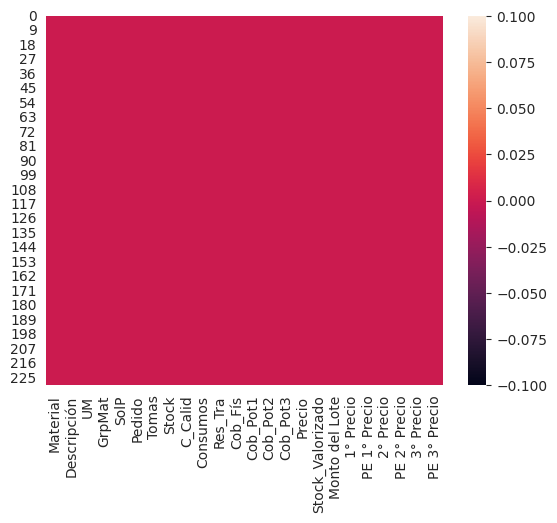

In [ ]:
#veo en un gráfico si hay datos nulos
sns.heatmap(df.isnull())

In [ ]:
#vemos la cantidad y porcentaje de datos nulos.
nulos = pd.DataFrame({'Cantidad' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (df.shape[0]) * (100)})
nulos

Cantidad  Porcentaje
Material                 0         0.0
Descripción              0         0.0
UM                       0         0.0
GrpMat                   0         0.0
SolP                     0         0.0
Pedido                   0         0.0
Tomas                    0         0.0
Stock                    0         0.0
C_Calid                  0         0.0
Consumos                 0         0.0
Res_Tra                  0         0.0
Cob_Fís                  0         0.0
Cob_Pot1                 0         0.0
Cob_Pot2                 0         0.0
Cob_Pot3                 0         0.0
Precio                   0         0.0
Stock_Valorizado         0         0.0
Monto del Lote           0         0.0
1° Precio                0         0.0
PE 1° Precio             0         0.0
2° Precio                0         0.0
PE 2° Precio             0         0.0
3° Precio                0         0.0
PE 3° Precio             0         0.0

Como el data set no posee datos nulos, no se deben eliminar
 columnas o reemplazar valores

In [ ]:
# Analizamos las medidas de información
df.describe()

Material        SolP        Pedido         Tomas         Stock  \
count  230.000000  230.000000    230.000000    230.000000    230.000000   
mean   115.500000    0.460870     60.869565   2497.108696   1053.238304   
std     66.539462    5.181066    890.630085   9835.975221   2721.820206   
min      1.000000    0.000000      0.000000      0.000000      0.000000   
25%     58.250000    0.000000      0.000000      0.000000     19.000000   
50%    115.500000    0.000000      0.000000     27.000000    166.000000   
75%    172.750000    0.000000      0.000000    478.750000    709.000000   
max    230.000000   70.000000  13500.000000  84000.000000  27573.000000   

           C_Calid      Consumos       Res_Tra     Cob_Fís    Cob_Pot1  ...  \
count   230.000000    230.000000    230.000000  230.000000  230.000000  ...   
mean      6.482609    484.750739    426.848000    0.739263    6.152189  ...   
std      86.484202   1756.752797   1742.406078   24.083618   18.310865  ...   
min       0.000000      0.080000      0.000000 -244.000000  -35.303030  ...   
25%       0.000000      7.190000      2.000000    0.588698    1.823285  ...   
50%       0.000000     53.375000     15.500000    2.411821    3.641568  ...   
75%       0.000000    167.815000     89.750000    5.556229    5.854304  ...   
max    1308.000000  15818.040000  16795.400000   96.478873  176.714286  ...   

         Cob_Pot3        Precio  Stock_Valorizado  Monto del Lote  \
count  230.000000  2.300000e+02      2.300000e+02    2.300000e+02   
mean     6.336189  6.926061e+04      2.659202e+06    9.207087e+08   
std     18.346683  2.576408e+05      7.951644e+06    2.257728e+09   
min    -35.000000  1.000000e-02      0.000000e+00    0.000000e+00   
25%      2.130481  6.305100e+02      3.869301e+04    2.358511e+07   
50%      3.908200  1.690185e+03      2.730166e+05    1.043445e+08   
75%      6.167835  5.180250e+03      1.572346e+06    6.598033e+08   
max    180.714286  2.035373e+06      7.847983e+07    1.890355e+10   

          1° Precio  PE 1° Precio     2° Precio  PE 2° Precio     3° Precio  \
count  2.300000e+02    230.000000  2.300000e+02    230.000000  2.300000e+02   
mean   4.947890e+05      2.792261  5.195647e+05      2.489696  5.502853e+05   
std    2.260142e+06      2.156890  2.313335e+06      2.283947  2.365423e+06   
min    5.390000e+01      0.230000  8.085000e+01      0.230000  1.232000e+02   
25%    1.649629e+03      1.000000  2.669012e+03      1.000000  3.580500e+03   
50%    3.838450e+03      3.000000  5.920337e+03      2.000000  8.604750e+03   
75%    1.546449e+04      4.000000  1.876105e+04      3.000000  2.350906e+04   
max    1.855700e+07     10.000000  1.869560e+07     10.000000  1.881110e+07   

       PE 3° Precio  
count    230.000000  
mean       2.608261  
std        1.553183  
min        0.500000  
25%        2.000000  
50%        3.000000  
75%        3.000000  
max       10.000000  

[8 rows x 21 columns]

In [ ]:
# imprimo cabecera del df
df.head(1)


Material                      Descripción UM     GrpMat  SolP  Pedido  \
0         1  CONDUCTOR CU DESNUDO 1 x 25 MM2  M  CABLE DIS     0       0   

   Tomas    Stock  C_Calid  Consumos  ...  Cob_Pot3   Precio  \
0      0  12223.0        0   1655.92  ...  0.969238  1471.04   

   Stock_Valorizado  Monto del Lote  1° Precio  PE 1° Precio  2° Precio  \
0       17980521.92    2.415509e+09    1991.99           3.0    3073.84   

   PE 2° Precio  3° Precio  PE 3° Precio  
0           2.0    3142.37           6.0  

[1 rows x 24 columns]

In [ ]:
# Imprimimos el tipo de datos de cada columna
print(df.dtypes)

Material              int64
Descripción          object
UM                   object
GrpMat               object
SolP                  int64
Pedido                int64
Tomas                 int64
Stock               float64
C_Calid               int64
Consumos            float64
Res_Tra             float64
Cob_Fís             float64
Cob_Pot1            float64
Cob_Pot2            float64
Cob_Pot3            float64
Precio              float64
Stock_Valorizado    float64
Monto del Lote      float64
1° Precio           float64
PE 1° Precio        float64
2° Precio           float64
PE 2° Precio        float64
3° Precio           float64
PE 3° Precio        float64
dtype: object


In [ ]:
# Verifico si se repiten los valores
print(df['Material'].value_counts())

Material
1      1
145    1
147    1
148    1
149    1
      ..
81     1
82     1
83     1
84     1
230    1
Name: count, Length: 230, dtype: int64


Vemos que no posee el DF valores duplicados

**Elimino las columnas de mi Data Frame que no vamos a utilizar**

In [ ]:
# Identificadmos el nombre de las columnas que vamos a borrar del DF
columnas_a_borrar = ['2° Precio', 'PE 2° Precio', '3° Precio', 'PE 3° Precio']

In [ ]:
# Eliminar las columnas
df = df.drop(columnas_a_borrar, axis=1)

**Conocemos nuestro Data Frame**

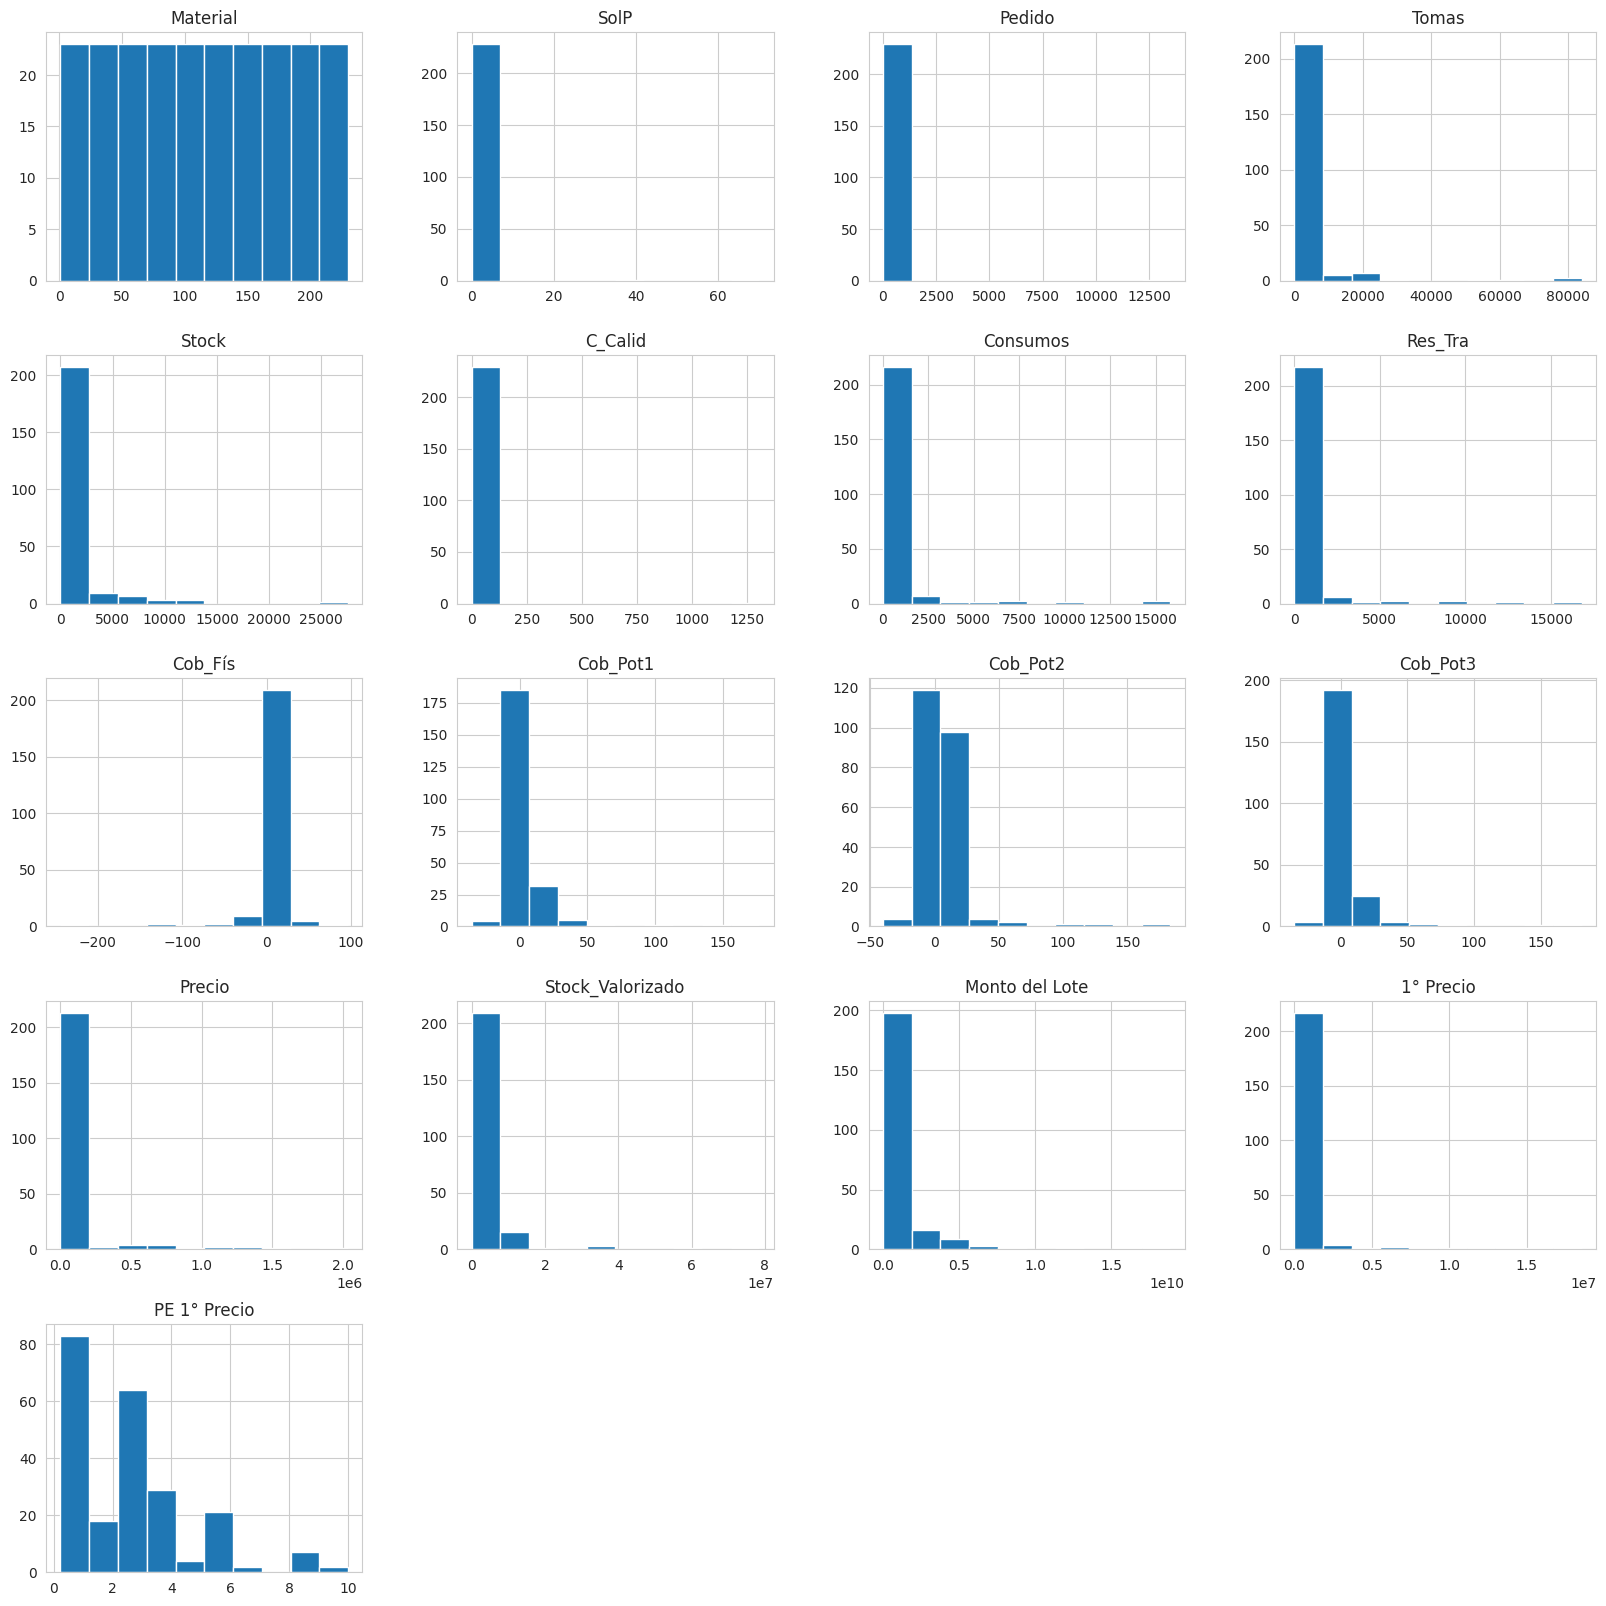

In [ ]:
#Realizamos un histograma para tener conocimiento global de el data Set de la empresa
p = df.hist(figsize = (20,20))


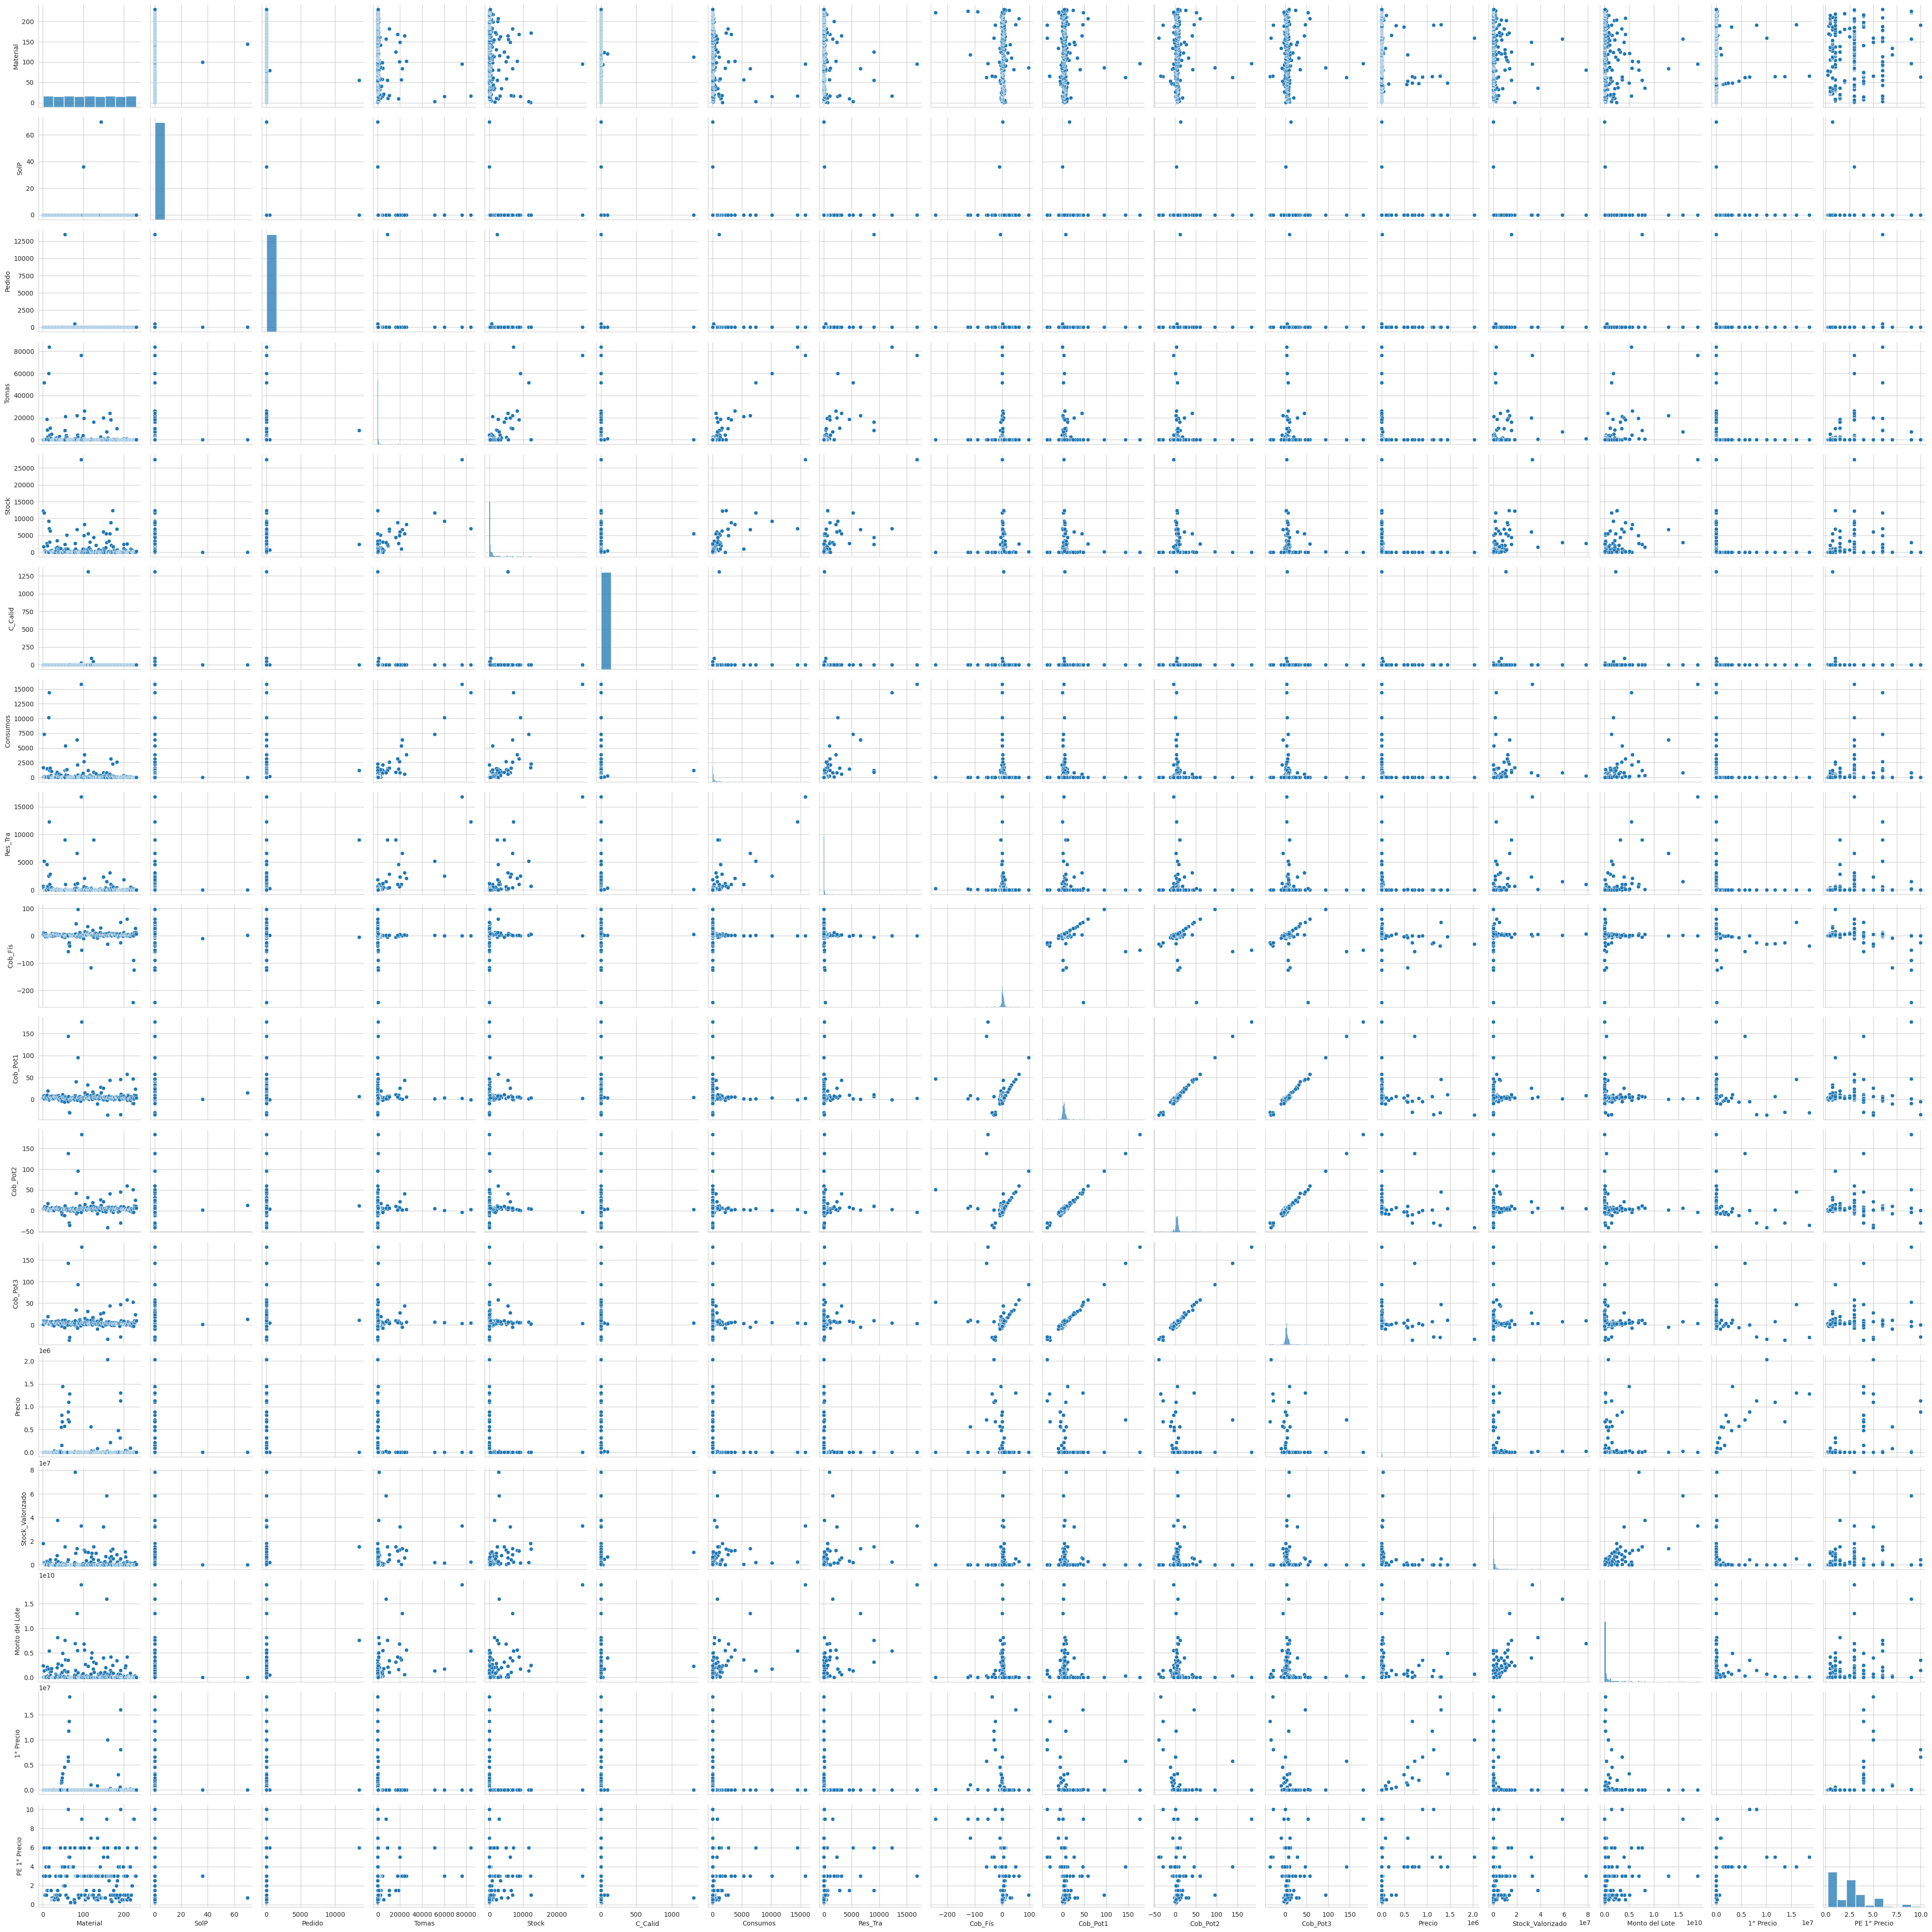

In [ ]:
# Mostramos la relacion de todas las variables de DF entre si
sns.pairplot(df)
plt.show()

**Exploración con Gráficos**

**Primera Hipotesis**

¿Puede el data set proporcionado por la empresa eléctrica brindar información sobre los materiales que posee la misma?

Para ello realizamos los siguientes gráficos

In [ ]:
# Muestro los distintos grupos de Materiales que posee la empresa
df.GrpMat.unique()

array(['CABLE DIS', 'HERRAJES', 'PROTECC.', 'AISLADOR', 'SEGURIDAD',
       'ACCES CAS', 'MORSETER.', 'TRAFO NUE', 'SOPORTES', 'MED.NUEV.',
       'COMUNIC.'], dtype=object)

In [ ]:
# Cuento cuantas matículas posee cada grupo
df.GrpMat.value_counts()

GrpMat
MORSETER.    52
PROTECC.     47
HERRAJES     40
CABLE DIS    31
ACCES CAS    16
TRAFO NUE    15
MED.NUEV.    10
SEGURIDAD     8
AISLADOR      5
SOPORTES      5
COMUNIC.      1
Name: count, dtype: int64

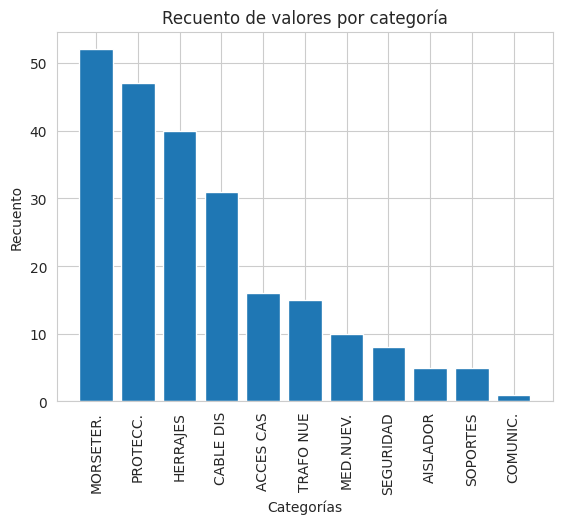

In [ ]:
# Obtener los recuentos de valores de la columna 'GrpMat'
counts = df['GrpMat'].value_counts()

# Crear un gráfico de barras
plt.bar(counts.index, counts.values)

# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Recuento')
plt.title('Recuento de valores por categoría')
# Rotar las etiquetas del eje horizontal y mostrarlas en vertical
plt.xticks(rotation='vertical')

# Mostrar el gráfico
plt.show()

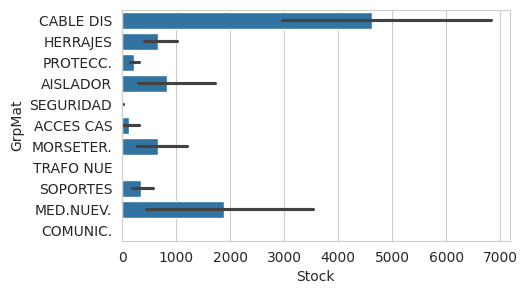

In [ ]:
#Gráfico de barras para ver el Stock por grupo de material
plt.figure(figsize=(5,3))
sns.barplot(y='GrpMat',x='Stock',data=df);

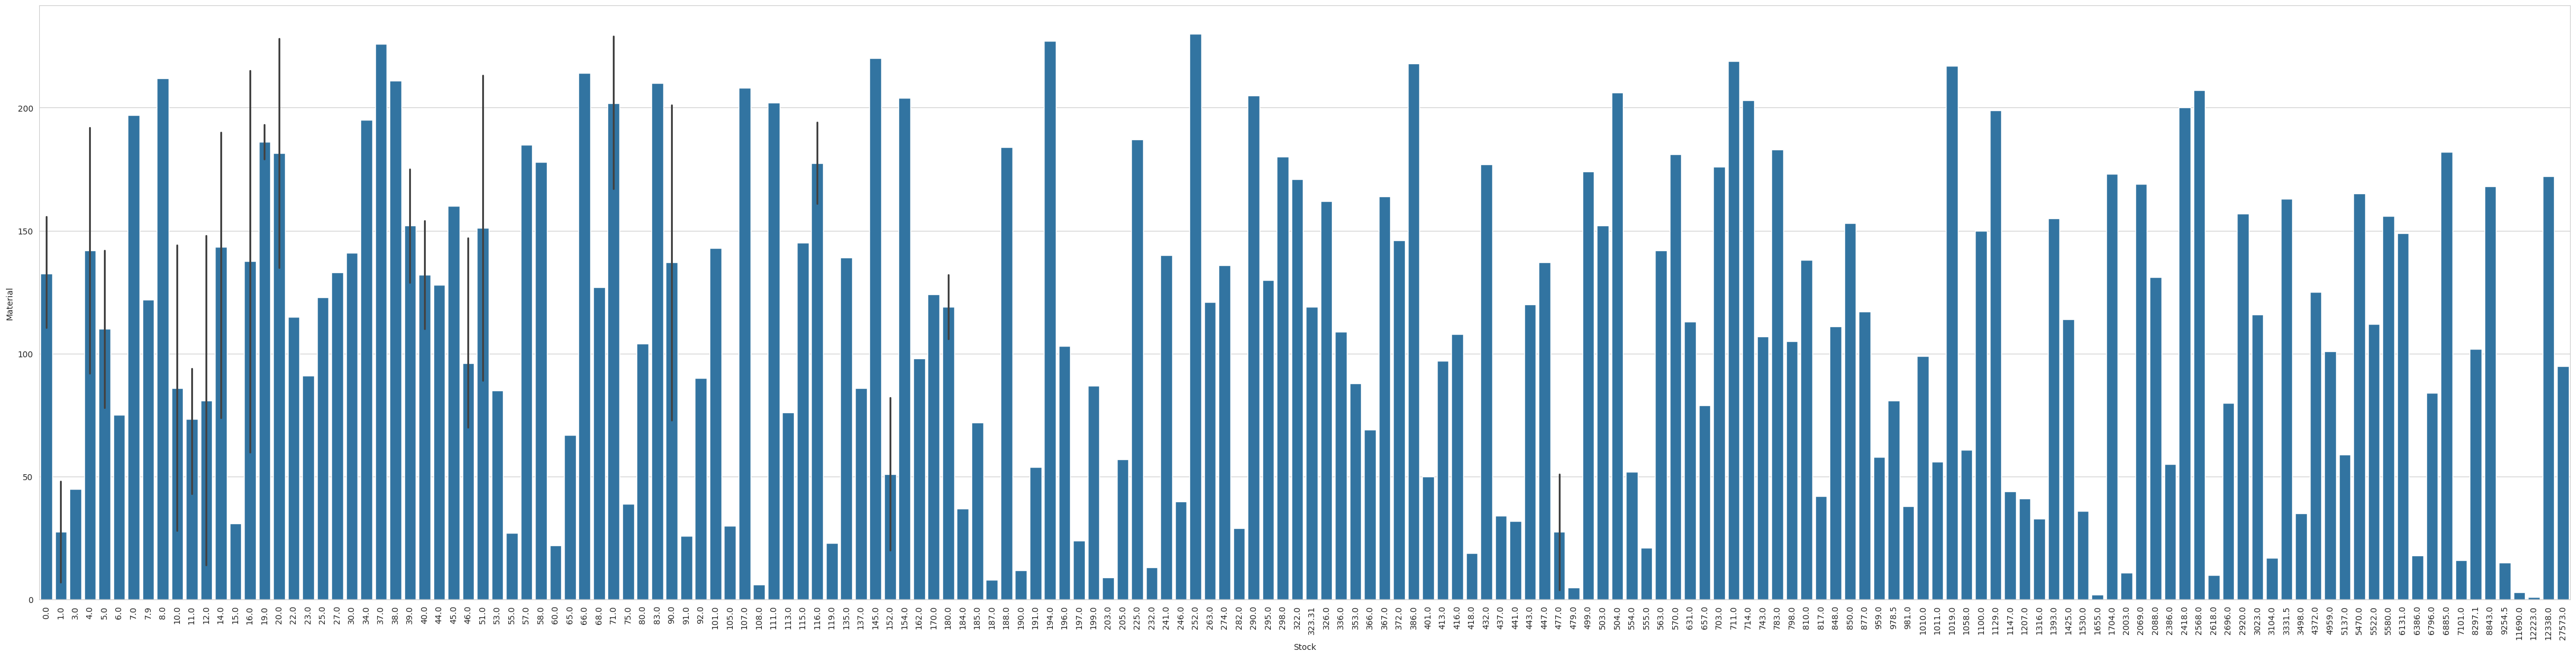

In [ ]:
#Gráfico de barras para ver el Stock por material
plt.figure(figsize=(55,13))
sns.barplot(y='Material',x='Stock',data=df)
plt.xticks(rotation='vertical');

In [ ]:
# Vamos a realizar un gráfico interactivo para mostrar el stock de materiales que compone cada grupo, asi tendremos una mejor visualización
# Importar librerias
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# Creo un Df que incluya en cada df los materiales de acuerdo al grupo al que pertenece
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Cables de Distribución
df_Cables = df[df['GrpMat'] == 'CABLE DIS']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Herrajes
df_Herrajes = df[df['GrpMat'] == 'HERRAJES']
# Filtar el DataFrame df para los datos donde la varialbe GrpMat sea igual a Protecciones
df_Protecc = df[df['GrpMat'] == 'PROTECC.']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Aisladores
df_Aislador = df[df['GrpMat'] == 'AISLADOR']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Seguridad
df_Seguridad = df[df['GrpMat'] == 'SEGURIDAD']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Accesorios CAS.
df_Acces_Cas = df[df['GrpMat'] == 'ACCES CAS']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Morseteria
df_Morseter = df[df['GrpMat'] == 'MORSETER.']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Transformadores Nuevos
df_Trafo_Nue = df[df['GrpMat'] == 'TRAFO NUE']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Soportes
df_Soportes = df[df['GrpMat'] == 'SOPORTES']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Medidores Nuevos
df_MedNuev = df[df['GrpMat'] == 'MED.NUEV.']
# Filtrar el DataFrame df para los datos donde la variabe GrpMat sea igual a Comunicaciones
df_Comunic = df[df['GrpMat'] == 'COMUNIC.']

In [ ]:
# Crear gráficos de barras para cada DataFrame que el Stock por material de acuerdo al grupo en que pertenece
fig1 = px.bar(df_Comunic, x='Descripción', y='Stock', title='Gráfico de df_Comunic')
fig2 = px.bar(df_Soportes, x='Descripción', y='Stock', title='Gráfico de df_Soportes')
fig3 = px.bar(df_Trafo_Nue, x='Descripción', y='Stock', title='Gráfico de df_Trafo_Nue')
fig4 = px.bar(df_Morseter, x='Descripción', y='Stock', title='Gráfico de df_Morseter')
fig5 = px.bar(df_Acces_Cas, x='Descripción', y='Stock', title='Gráfico de df_Acces_Cas')
fig6 = px.bar(df_Seguridad, x='Descripción', y='Stock', title='Gráfico de df_Seguridad')
fig7 = px.bar(df_Aislador, x='Descripción', y='Stock', title='Gráfico de df_Aislador')
fig8 = px.bar(df_Protecc, x='Descripción', y='Stock', title='Gráfico de df_Protecc')
fig9 = px.bar(df_Herrajes, x='Descripción', y='Stock', title='Gráfico de df_Herrajes')
fig10 = px.bar(df_Cables, x='Descripción', y='Stock', title='Gráfico de df_Cables')

# Mostrar los gráficos en un solo lienzo
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()
fig9.show()
fig10.show()

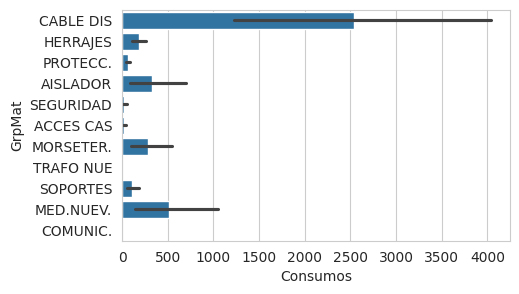

In [ ]:
#Gráfico de barras para ver el Consumo por grupo de material
plt.figure(figsize=(5,3))
sns.barplot(y='GrpMat',x='Consumos',data=df);

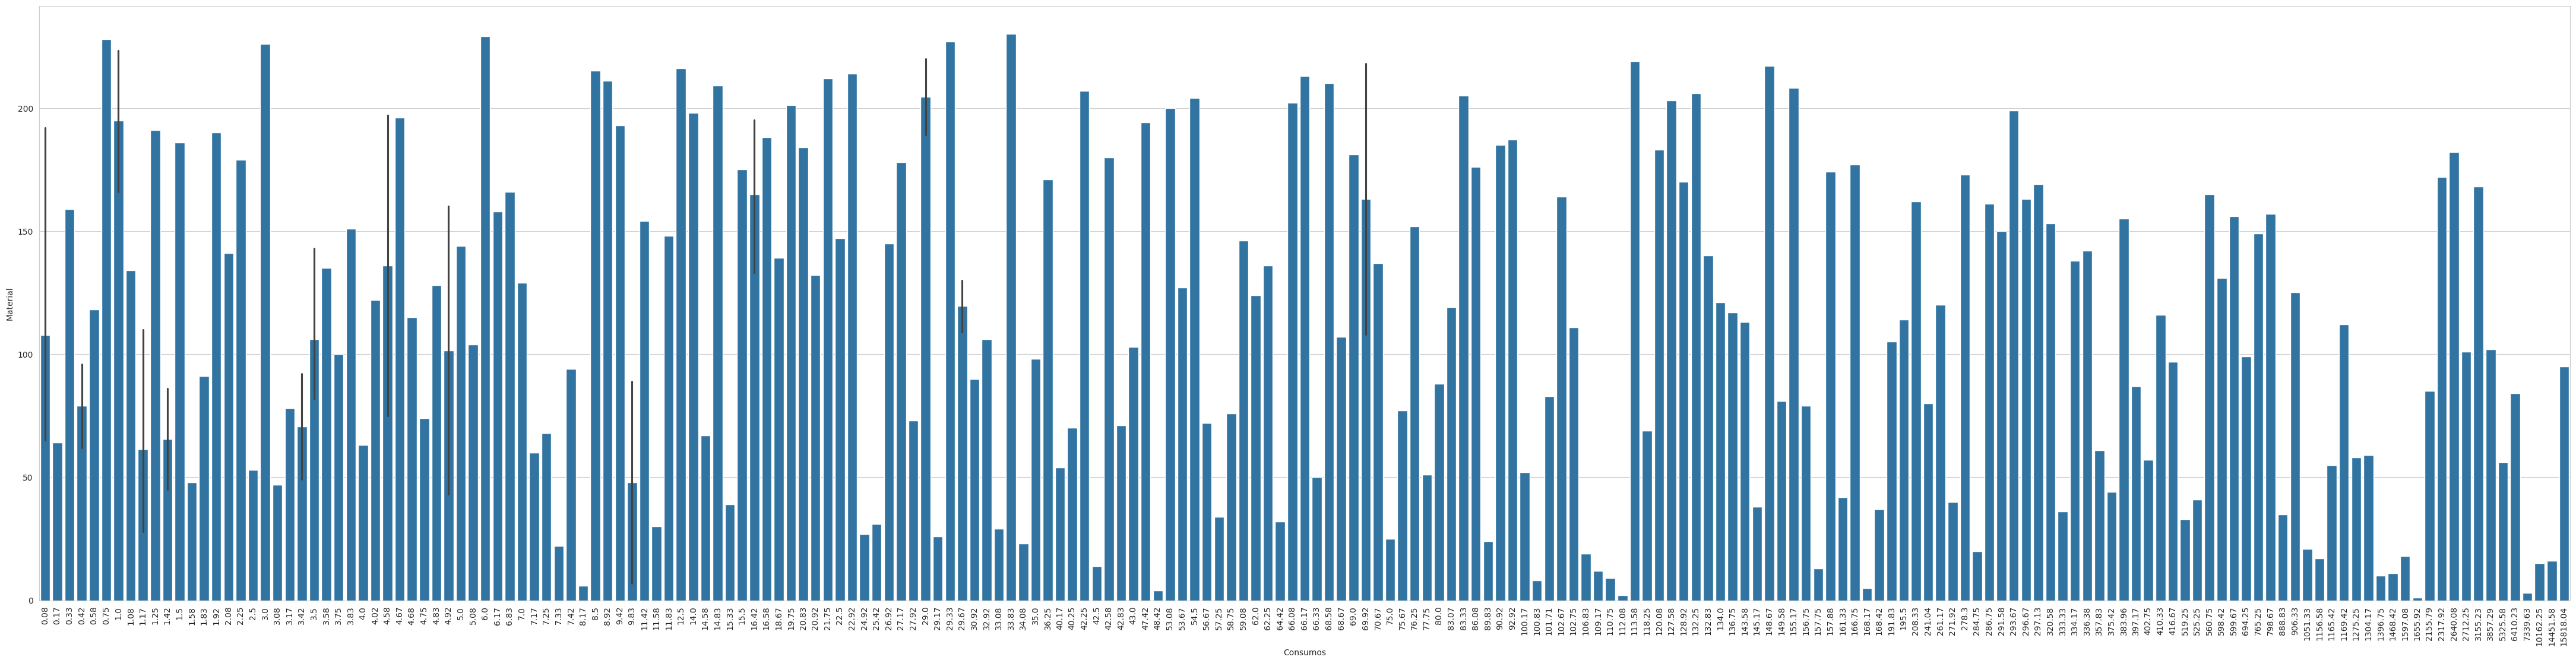

In [ ]:
#Gráfico de barras para ver el Consumo por material
plt.figure(figsize=(55,13))
sns.barplot(y='Material',x='Consumos',data=df)
plt.xticks(rotation='vertical');

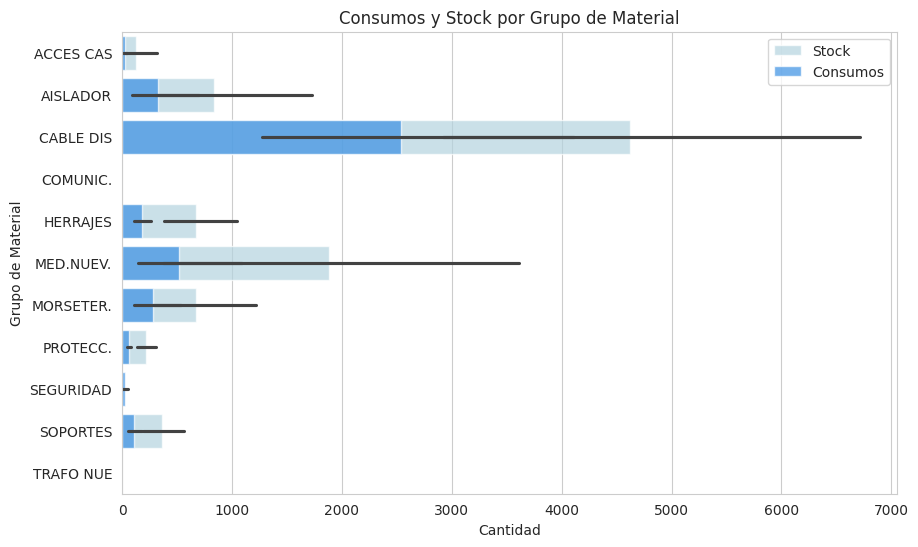

In [ ]:
# Se presenta un gráfico bivariado que muestra el Stock y el Consumo por grupo de material

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Ordenar el DataFrame por grupo de material para mantener consistencia en el gráfico
df_sorted = df.sort_values(by='GrpMat')

# Graficar Consumos y Stock como barras apiladas
sns.barplot(y='GrpMat', x='Stock', data=df_sorted, color='lightblue', alpha=0.7, label='Stock')
sns.barplot(y='GrpMat', x='Consumos', data=df_sorted, color='dodgerblue', alpha=0.7, label='Consumos')

# Añadir título y etiquetas de los ejes
plt.title('Consumos y Stock por Grupo de Material')
plt.xlabel('Cantidad')
plt.ylabel('Grupo de Material')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

**Segunda Hipótesis**

¿ Es posible conocer que grupo de materiales posee en mayor medida la empresa? ¿ Y si lo vemos según su valor?

In [ ]:
df.cant = {'GrupoMat': df.GrpMat,
        'Stock': df.Stock}

<ipython-input-141-40cba46debf2>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
dfHipo2= pd.DataFrame(df.cant)

In [ ]:
# Crear un nuevo DataFrame con la suma de Variable Stock  agrupada por grupo de material
dfHipotesis2 = dfHipo2.groupby('GrupoMat')['Stock'].sum()

In [ ]:
# Renombrar la columna resultante
dfHipotes2 = dfHipo2.rename(columns={'Stock': 'Suma_Stock'})

In [ ]:
# Mostrar el nuevo DataFrame
print(dfHipotes2)

      GrupoMat  Suma_Stock
0    CABLE DIS     12223.0
1    CABLE DIS      1655.0
2    CABLE DIS     11690.0
3     HERRAJES       477.0
4     HERRAJES       479.0
..         ...         ...
225  MORSETER.        37.0
226  MORSETER.       194.0
227  MORSETER.        20.0
228  MORSETER.        71.0
229  ACCES CAS       252.0

[230 rows x 2 columns]


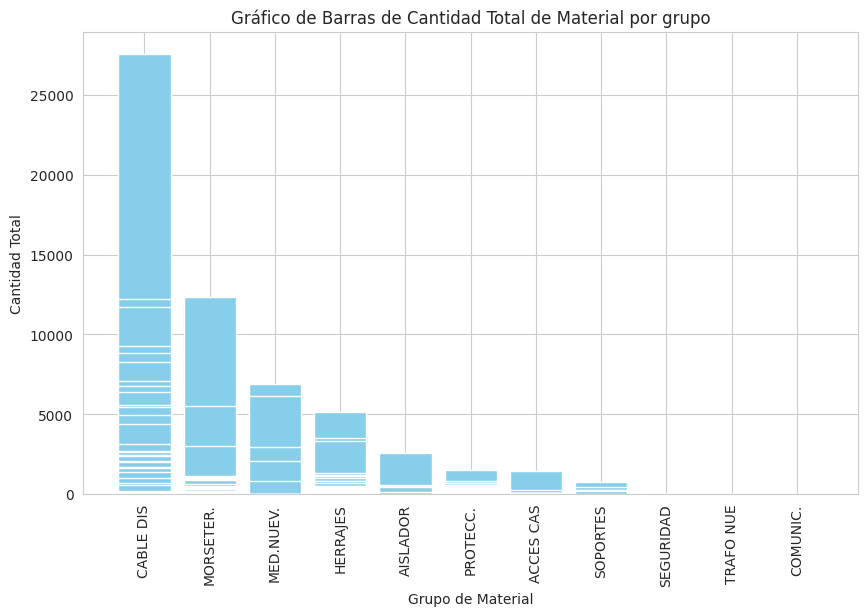

In [ ]:
# Ordenar el DataFrame por la variable resultante de la suma de mayor a menor
dfHipotes2_sorted = dfHipotes2.sort_values(by='Suma_Stock', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dfHipotes2_sorted['GrupoMat'], dfHipotes2_sorted['Suma_Stock'], color='skyblue')

# Agregar títulos y etiquetas
plt.title('Gráfico de Barras de Cantidad Total de Material por grupo')
plt.xlabel('Grupo de Material')
plt.ylabel('Cantidad Total')
plt.xticks(rotation='vertical')
plt.show()

Si analizamos la composición de capital de la empresa, centrandonos en la cantidad de materiales, observamos que el grupo de materiales predominantes esta dado por los Cables de Distribución

Vamos a realizar el analisis pero por monto ahora

In [ ]:
df.Monto = {'GrupoMat': df.GrpMat,
        'Stock_Valor': df.Stock_Valorizado}

<ipython-input-147-6b483355c0f8>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
dfHip2= pd.DataFrame(df.Monto)

In [ ]:
# Crear un nuevo DataFrame con la suma de Variable Valor del Stock agrupada por Grupo de materiales
dfHipot2 = dfHip2.groupby('GrupoMat')['Stock_Valor'].sum()

In [ ]:
# Renombrar la columna resultante
dfHipot2 = dfHipot2.reset_index().rename(columns={'Stock_Valor': 'Suma_Stock_Valor'})

In [ ]:
# Mostrar el nuevo DataFrame
print(dfHipot2)

     GrupoMat  Suma_Stock_Valor
0   ACCES CAS      6.889918e+06
1    AISLADOR      6.378308e+06
2   CABLE DIS      2.735191e+08
3    COMUNIC.      0.000000e+00
4    HERRAJES      4.247151e+07
5   MED.NUEV.      1.103790e+08
6   MORSETER.      4.747528e+07
7    PROTECC.      7.853245e+07
8   SEGURIDAD      7.820014e+06
9    SOPORTES      2.618338e+07
10  TRAFO NUE      1.196755e+07


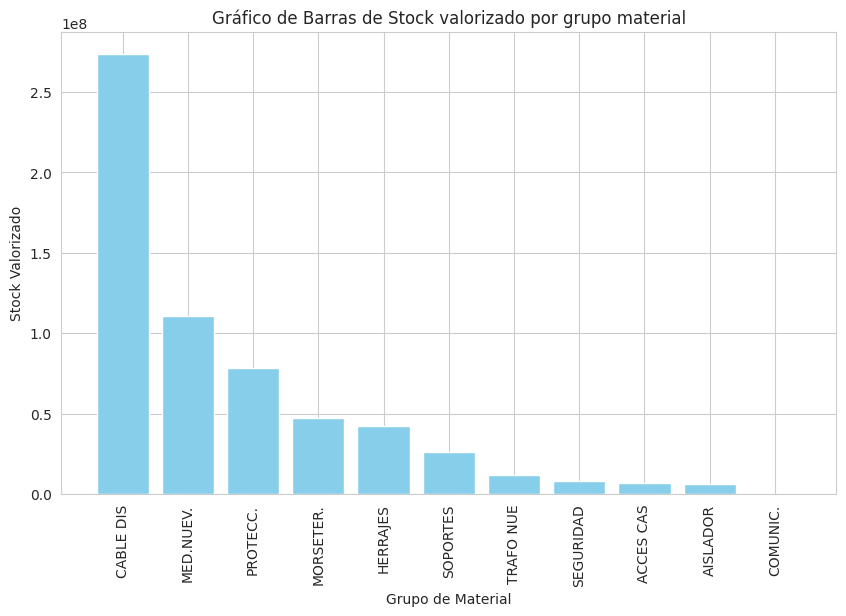

In [ ]:
# Ordenar el DataFrame por la variable resultante de la suma valor Stock de mayor a menor
dfHipot2_sorted = dfHipot2.sort_values(by='Suma_Stock_Valor', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dfHipot2_sorted['GrupoMat'], dfHipot2_sorted['Suma_Stock_Valor'], color='skyblue')

# Agregar títulos y etiquetas
plt.title('Gráfico de Barras de Stock valorizado por grupo material')
plt.xlabel('Grupo de Material')
plt.ylabel('Stock Valorizado')
plt.xticks(rotation='vertical')
plt.show()

Si analizamos ahora en base a la valorización de los materiales, llegamos a la misma conclusión. En el capital de la empresa, predomina en monto, el grupo de cables, pero en segundo lugar, difiere al analisis de cantidades que ocupaba el grupo Morsetería, en este caso, es el grupo de Medidiores Nuevos.

**Tercera Hipotesis**

¿ Podemos determinar cual es el grupo que posee mayor cantidad de matrículas?

In [ ]:
# Obtener el orden de las categorías por frecuencia
order = df['GrpMat'].value_counts().index

<ipython-input-154-994c12206862>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




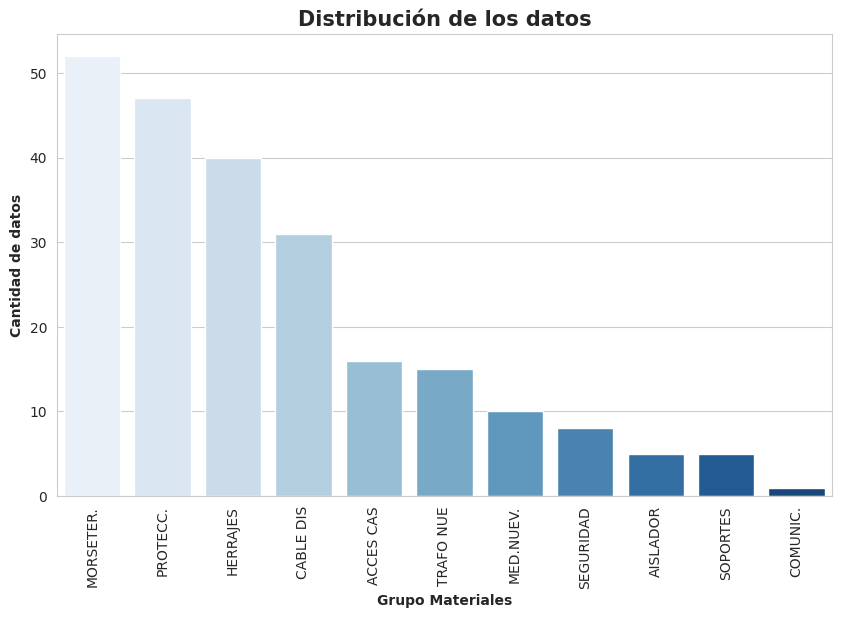

In [ ]:
# Realizamos un gráfico para ver la frecuencia de observaciones en cada categoría de material
plt.figure(figsize=(10, 6))
sns.countplot(x=df['GrpMat'], order=order, palette='Blues')
plt.xlabel('Grupo Materiales', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de datos', fontsize=10, fontweight='bold')
plt.title('Distribución de los datos', fontweight='bold', fontsize='15')
plt.xticks(rotation='vertical')
plt.show()

Podemos observar que el grupo que contiene mayor cantidad de matrículas es el grupo de Morsetería, seguido por Protecciones
Si bien veíamos que los cables de Distribución representan el mayor stock de la empresa, no son los que poseen mayor cantidad de matrículas

**Cuarta Hipotesis**

Tomando como stock óptimo una cobertura física igual o mayor 2, ¿ Podemos identificar los materiales que se encuentra con cobertura óptima o con baja cobertura?

In [ ]:
# Comenzamos dividiendo el DafaFrame en dos grupo un grupo
df_Baja_Cobertura = df[df['Cob_Fís'] < 2] # grupo de materiales que posee una Cobertura física menor a 2 (Baja cobertura)
df_Cobertura_Optima = df[df['Cob_Fís'] >= 2] # grupo de materiales que posee una Cobertura física igual o mayor a 2 (Cobertura óptima)

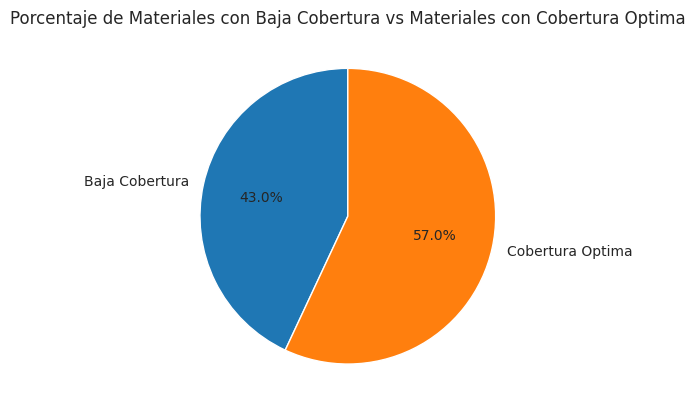

In [ ]:
# Realizamos un grafico de pastel
labels = ['Baja Cobertura', 'Cobertura Optima']
sizes = [len(df_Baja_Cobertura), len(df_Cobertura_Optima)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de Materiales con Baja Cobertura vs Materiales con Cobertura Optima')
plt.show()

Vemos que el DataFrame posee un mayor porcetaje de datos sobre materiales que poseen cobertura óptima, aunque considero que la diferencia no es significativa

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98],
 [Text(0, 0, 'CONDUCTOR AL AL 35 MM2'),
  Text(1, 0, 'FUSIBLE NH 16 A 500 V DIN 00'),
  Text(2, 0, 'FUSIBLE NH 50 A 500 V DIN 00'),
  Text(3, 0, 'TILLA H°G° 600 MM W 5/8"'),
  Text(4, 0, 'CABLE AL AC PROTEGIDO 95/15 MM2 15 KV'),
  Text(5, 0, 'CABLE PREENSAMBLADO 3 X 95 + 1X50 MM2 BT'),
  Text(6, 0, 'CABLE PREENSAMBLADO 3 X 50 MM2 MT'),
  Text(7, 0, 'FUSIBLE NH 80 A 500 V DIN 00'),
  Text(8, 0, 'FUSIBLE NH 63 A 5

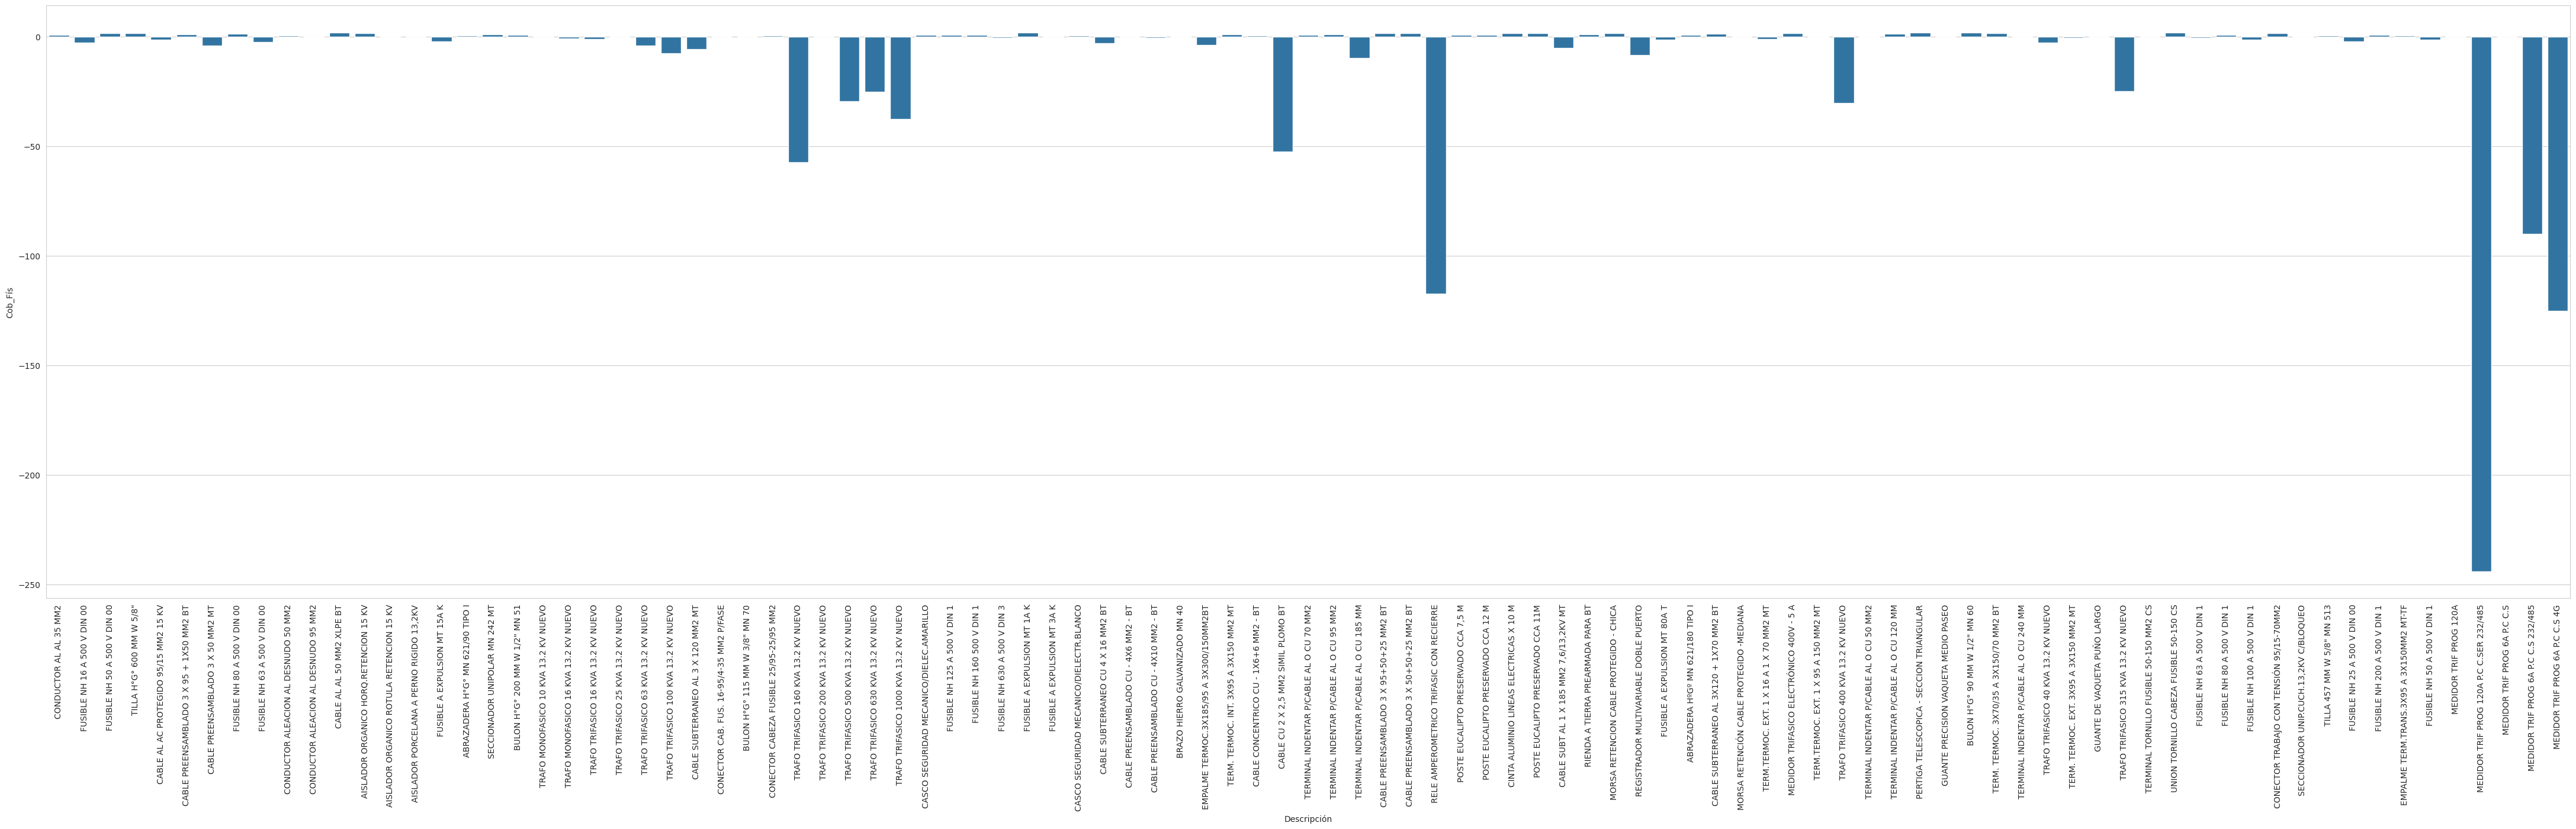

In [ ]:
#Gráfico de barras para identificar los materiales con Cobertura física menor a 2
plt.figure(figsize=(55,13))
sns.barplot(y='Cob_Fís',x='Descripción',data=df_Baja_Cobertura)
plt.xticks(rotation='vertical')

In [ ]:
#Creo un nuevo df para limpiar los outliners y obtener un gráfico mas claro (Cobertura física menor a 2 y mayor o igual a -5)
condicion = (df['Cob_Fís'] >= -5) & (df['Cob_Fís'] < 2)
dfCobFisBaja = df.loc[condicion]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 [Text(0, 0, 'CONDUCTOR AL AL 35 MM2'),
  Text(1, 0, 'FUSIBLE NH 16 A 500 V DIN 00'),
  Text(2, 0, 'FUSIBLE NH 50 A 500 V DIN 00'),
  Text(3, 0, 'TILLA H°G° 600 MM W 5/8"'),
  Text(4, 0, 'CABLE AL AC PROTEGIDO 95/15 MM2 15 KV'),
  Text(5, 0, 'CABLE PREENSAMBLADO 3 X 95 + 1X50 MM2 BT'),
  Text(6, 0, 'CABLE PREENSAMBLADO 3 X 50 MM2 MT'),
  Text(7, 0, 'FUSIBLE NH 80 A 500 V DIN 00'),
  Text(8, 0, 'FUSIBLE NH 63 A 500 V DIN 00'),
  Text(9, 0, 'CONDUCTOR ALEACION AL DESNUDO 50 MM2'),
  Text(10, 0, 'CONDUCTOR AL

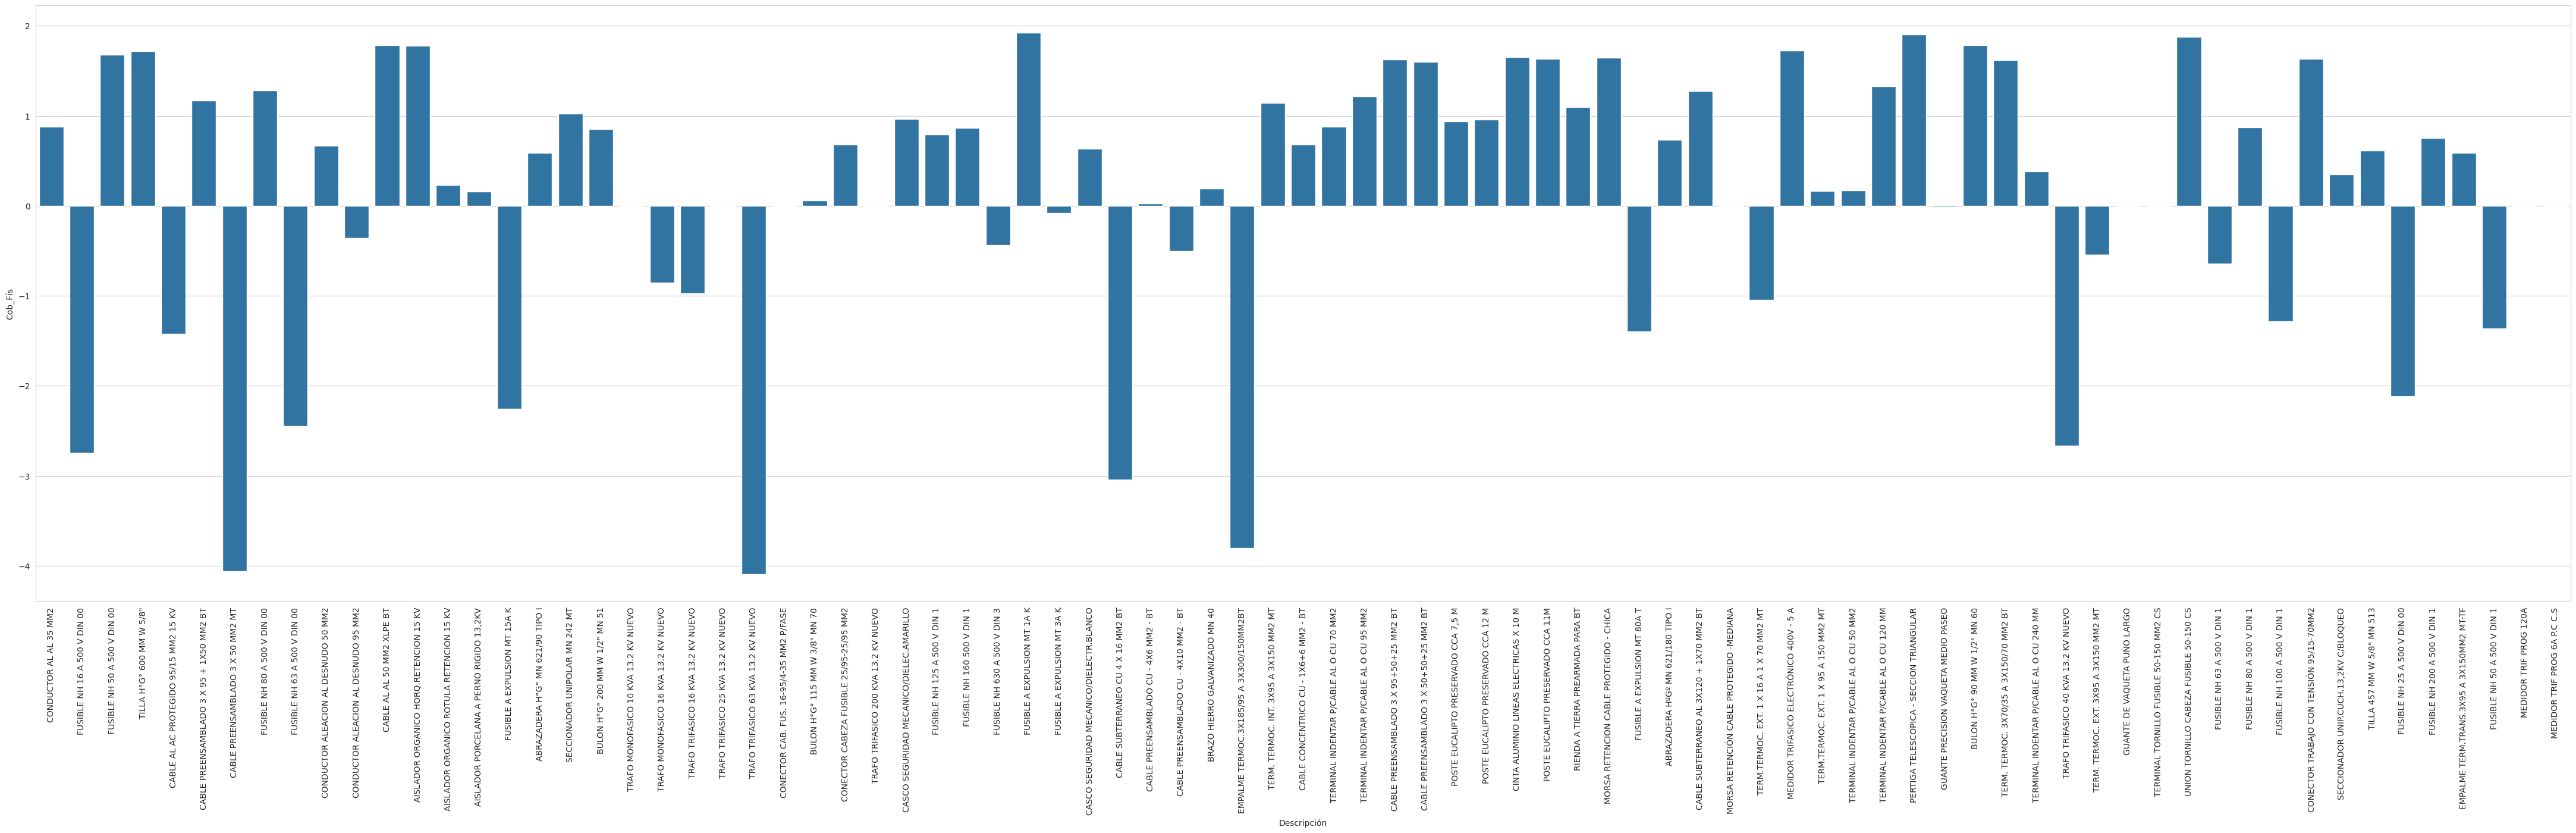

In [ ]:
# Creo un nuevo df para limpiar los outliers y obtener un gráfico más claro (Cobertura física menor a 2 y mayor o igual a -5)
condicion = (df['Cob_Fís'] >= -5) & (df['Cob_Fís'] < 2)
dfCobFisBaja = df.loc[condicion]

# Realizo un gráfico de barras
plt.figure(figsize=(55, 13))
sns.barplot(y='Cob_Fís', x='Descripción', data=dfCobFisBaja)
plt.xticks(rotation='vertical')

Analizaremos ahora los que poseen la cobertura deseada, Cobertura física mayor o igual a 2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130],
 [Text(0, 0, 'CONDUCTOR CU DESNUDO 1 x 25 MM2'),
  Text(1, 0, 'CONDUCTOR CU DESNUDO 1 x 50 MM2'),
  Text(2, 0, 'PROLONGACION H°G° A 90° 115 MM DE LARGO'),
  Text(3, 0, 'RACK PARA 1 AISLADOR MN

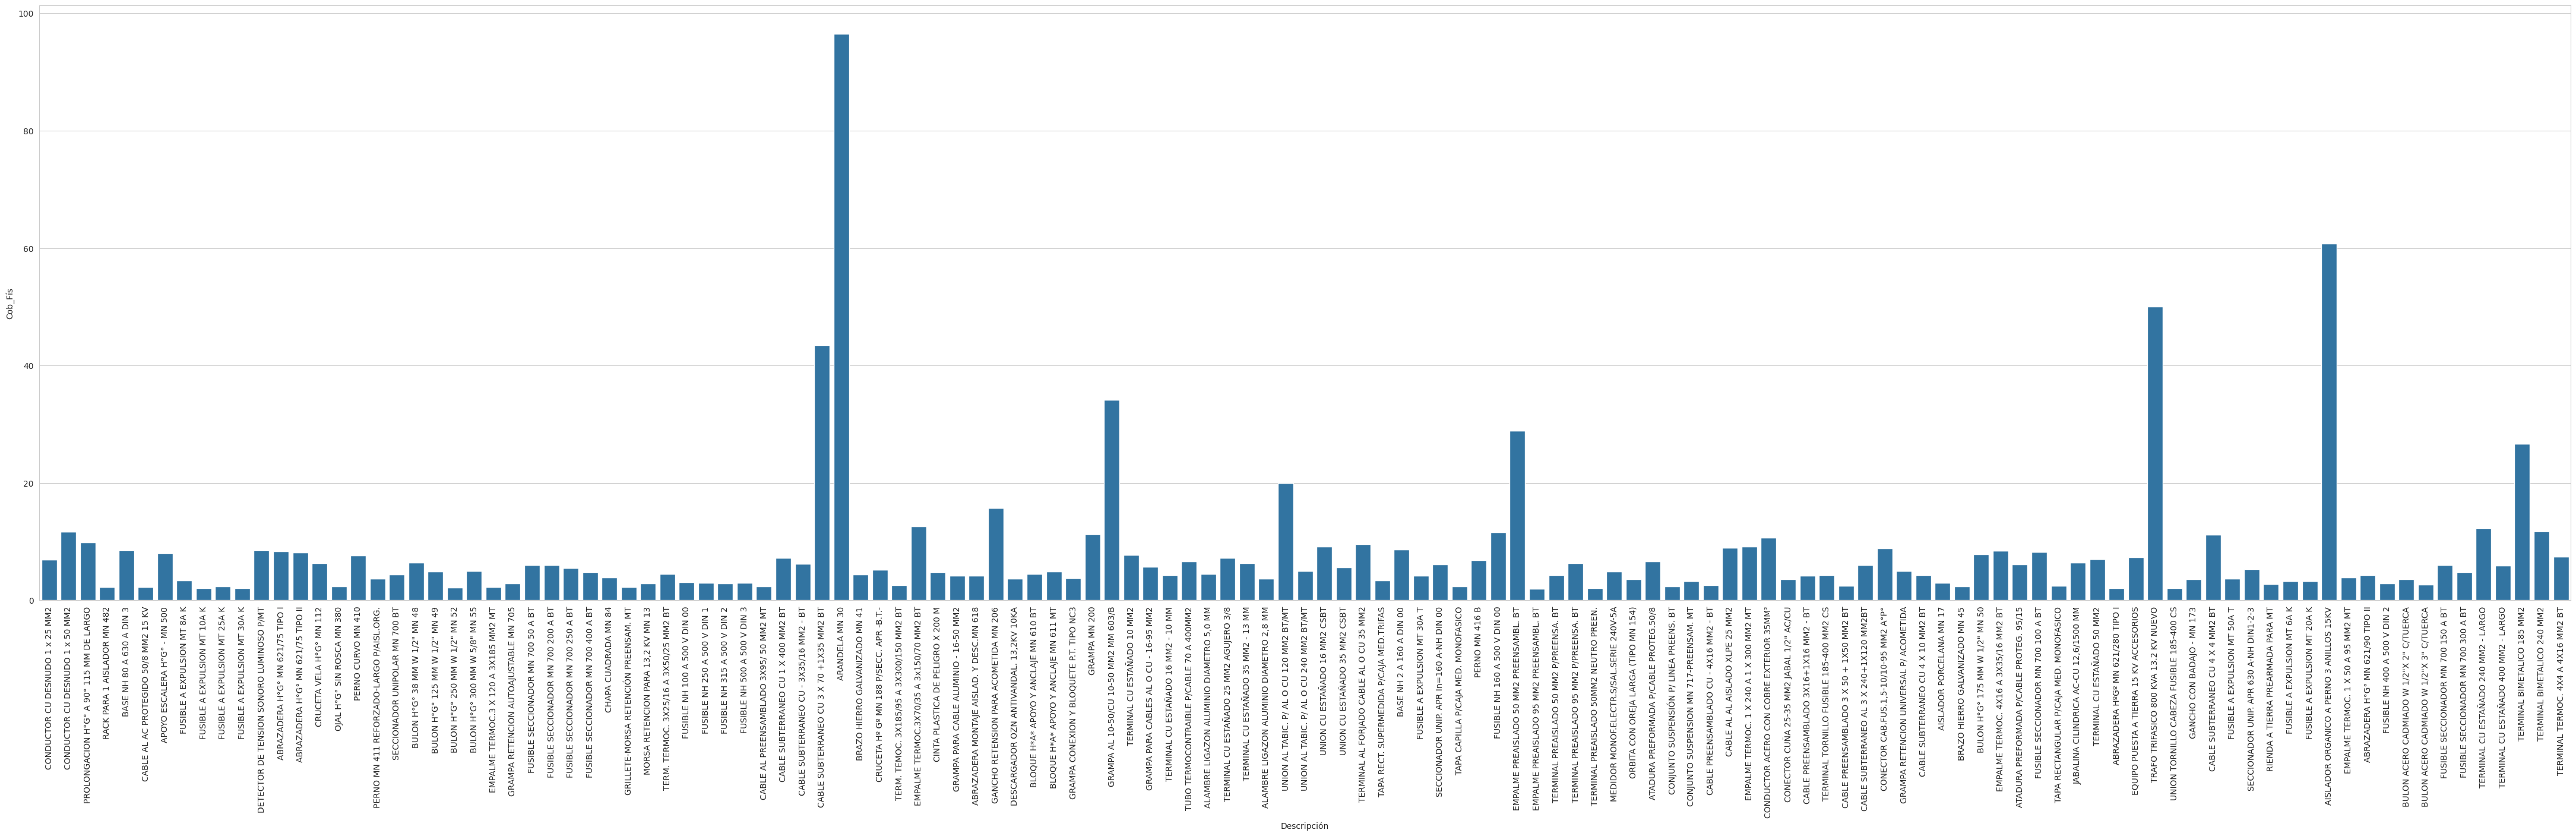

In [ ]:
#Gráfico de barras para identificar los materiales con Cobertura física mayor o igual a 2
plt.figure(figsize=(55,13))
sns.barplot(y='Cob_Fís',x='Descripción',data=df_Cobertura_Optima)
plt.xticks(rotation='vertical')

In [ ]:
# Creo un nuevo df para limpiar los outliners y obtener un gráfico mas claro (Cobertura física mayor o igual a 2 y menor a 7)
condicion = (df['Cob_Fís'] >= 2) & (df['Cob_Fís'] < 7)
dfCobFisOptima1 = df.loc[condicion]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, 'CONDUCTOR CU DESNUDO 1 x 25 MM2'),
  Text(1, 0, 'RACK PARA 1 AISLADOR MN 482'),
  Text(2, 0, 'CABLE AL AC PROTEGIDO 50/8 MM2 15 KV'),
  Text(3, 0, 'FUSIBLE A EXPULSION MT 8A K'),
  Text(4, 0, 'FUSIBLE A EXPULSION MT 10A K'),
  Text(5, 0, 'FUSIBLE A EXPULSION MT 25A K'),
  Text(6, 0, 'FUSIBLE A EXPULSION MT 30A K'),
  Text(7, 0, 'CRUCETA VELA H°G° MN 112'),
  Text(8, 0, 'OJAL H°G° SIN ROSCA MN 380'),
  Text(9, 0, 'PERNO MN 411 REFORZADO-LAR

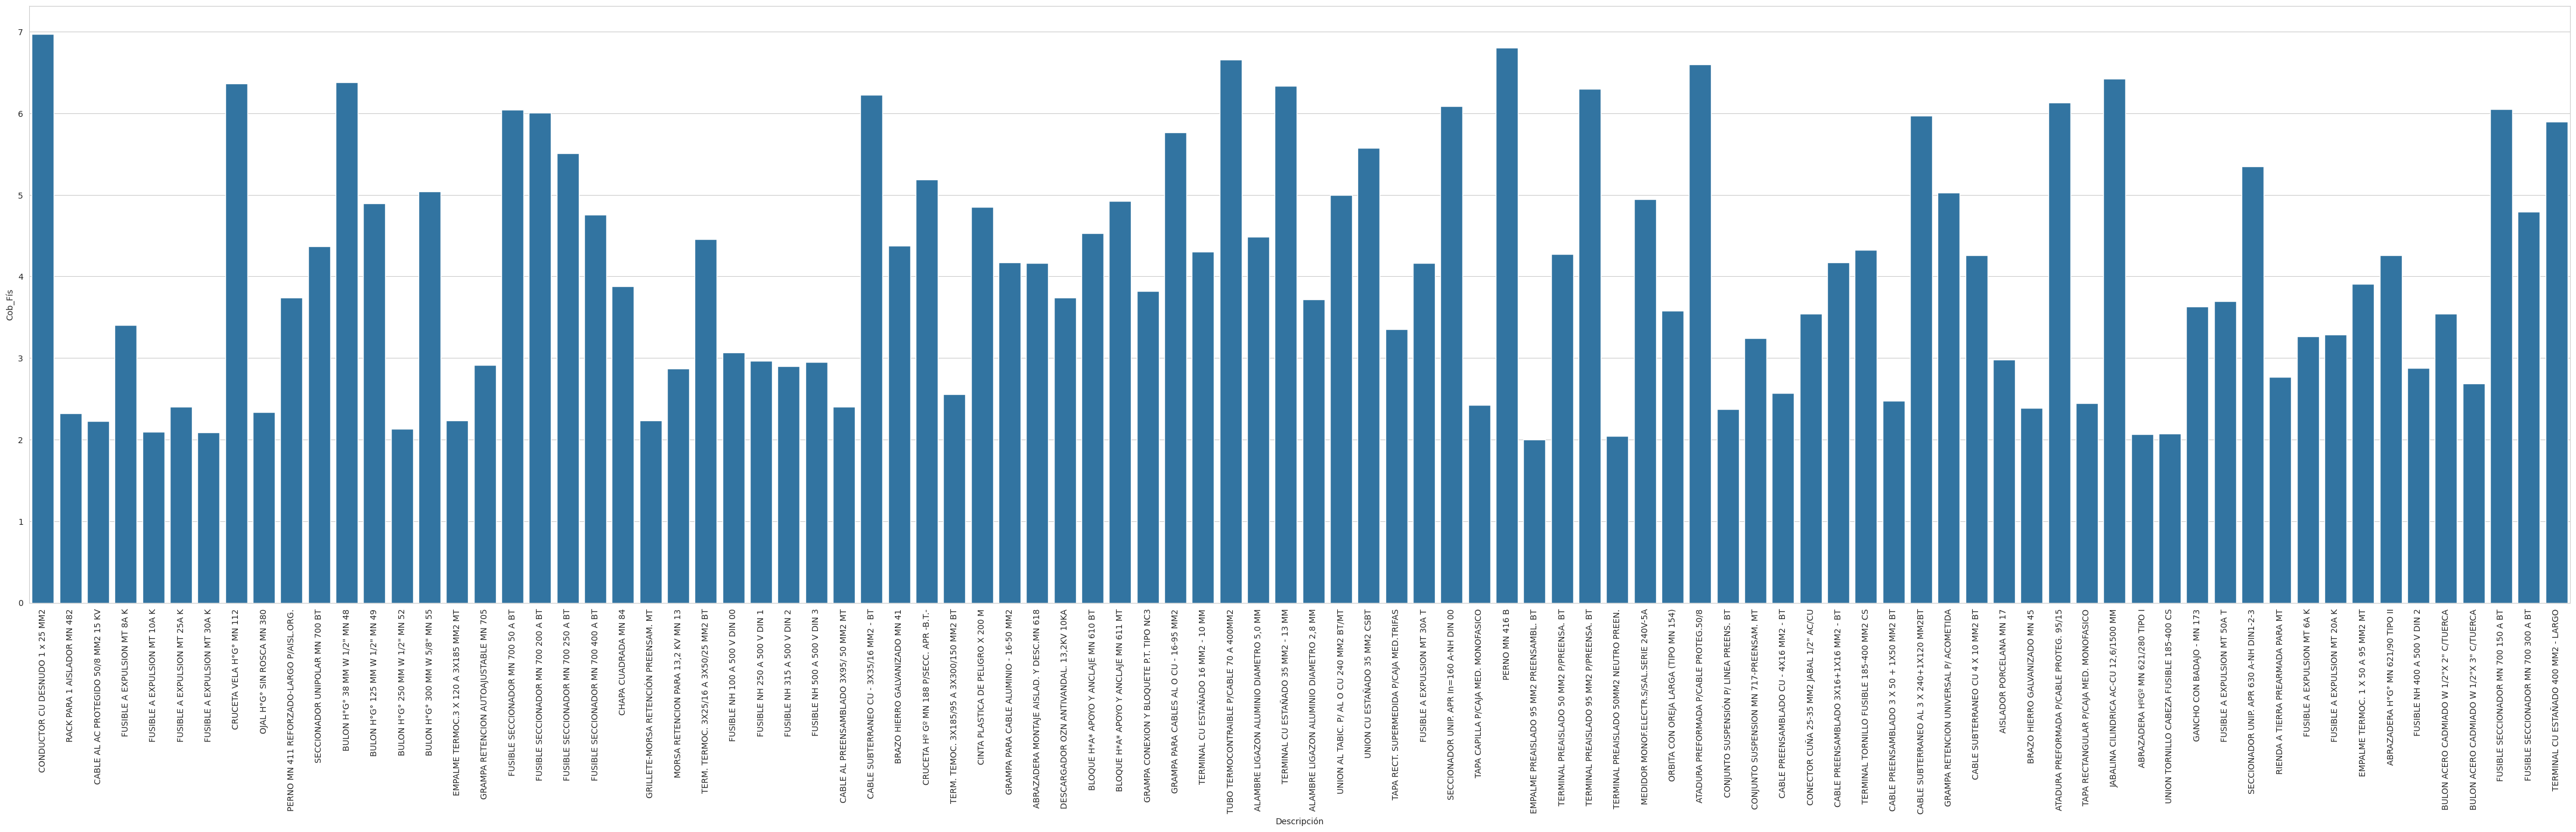

In [ ]:
#Gráfico de barras para identificar los materiales con Cobertura física mayor o igual a 2 y menor a 7
plt.figure(figsize=(55,13))
sns.barplot(y='Cob_Fís',x='Descripción',data=dfCobFisOptima1)
plt.xticks(rotation='vertical')

**`Quinta Hipótesis `**

¿ Posee una relación directa el consumo con el stock?

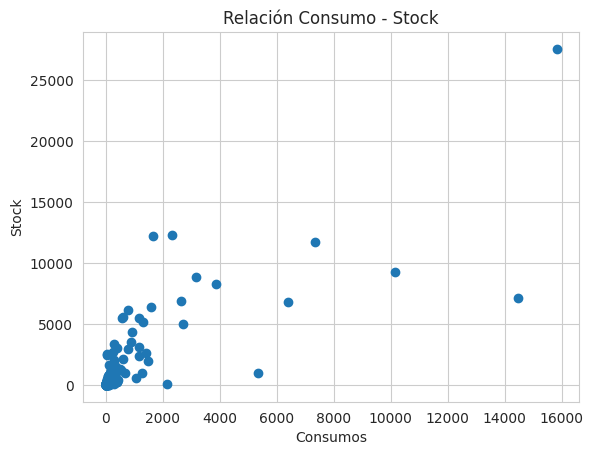

In [ ]:
# Crear un gráfico de puntos
plt.scatter(df['Consumos'], df['Stock'])
plt.title('Relación Consumo - Stock')
plt.xlabel('Consumos')
plt.ylabel('Stock')
plt.show()

Como no se llega a ver bien la relación, vamos a tomar los data Frame creados en la hipotesis de la Cobertura física

In [ ]:
# DataFrame Creados
df_Baja_Cobertura = df[df['Cob_Fís'] < 2] # grupo de materiales que posee una Cobertura física menor a 2 (Baja cobertura)
df_Cobertura_Optima = df[df['Cob_Fís'] >= 2] # grupo de materiales que posee una Cobertura física igual o mayor a 2 (Cobertura óptima)

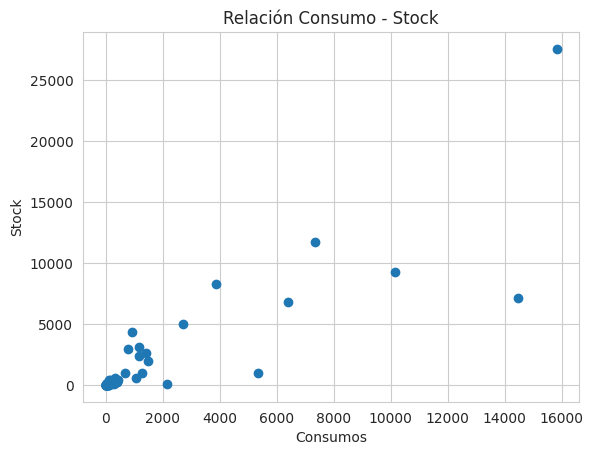

In [ ]:
# Crear un gráfico de puntos de baja cobertura
plt.scatter(df_Baja_Cobertura['Consumos'], df_Baja_Cobertura['Stock'])
plt.title('Relación Consumo - Stock')
plt.xlabel('Consumos')
plt.ylabel('Stock')
plt.show()

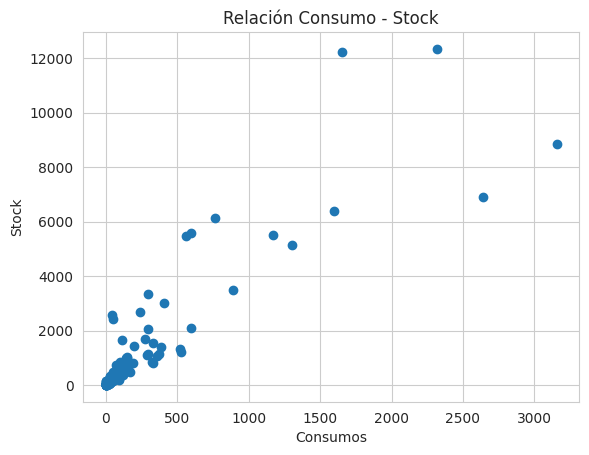

In [ ]:
# Crear un gráfico de puntos de cobertura Fisica Óptima
plt.scatter(df_Cobertura_Optima['Consumos'], df_Cobertura_Optima['Stock'])
plt.title('Relación Consumo - Stock')
plt.xlabel('Consumos')
plt.ylabel('Stock')
plt.show()

Podemos observar una relación directa entre consumo y stock

# **MODELO y MÉTRICAS**

Nos enfocaremos en un Modelo de regresión lineal multiple, para predecir la cobertura física de cada material de la compañia.

Predecir la Cobertura física a traves de diferentes métrícas será nuestra hipótesis de análisis central.

La cobertura física de los materiales, es nuestra variable dependientes. Nuestras variables independientes son Stock, materiales que se encuentran en Control de Calidad, reservas de traslado y el consumo mensual del material en cuestión.



Vamos a resolver a travez de un modelo de regresión lineal múltiple, la hipotesis, a mi enteder más relevante. ¿ Cual es la cobertura física de los diferentes materiales de la empresa?

***Preparación de los datos***

Vamos a borrar los outliners, para evitar distorciones

In [ ]:
# Queremos limpiar de la variable 'Cob_Fis'los outliers

Q1 = df['Cob_Fís'].quantile(0.25)
Q3 = df['Cob_Fís'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Identificar las filas con outliers en la columna 'Cob_Fis'
outliers_mask = (df['Cob_Fís'] < Q1 - 1.5 * IQR) | (df['Cob_Fís'] > Q3 + 1.5 * IQR)

In [ ]:
# Filtrar las filas que contienen outliers y eliminarlas del DataFrame. Este nuevo df se llamará dfnuevo
dfnuevo = df[~outliers_mask]

In [ ]:
# Veamos como quedo nuestro nuevo df
# Primero imprimimos el df original
print("Cantidad de filas y columnas:", df.shape)

Cantidad de filas y columnas: (230, 20)


In [ ]:
#Ahora imprimo mi nuevo df
print("Cantidad de filas y columnas:", dfnuevo.shape)

Cantidad de filas y columnas: (207, 20)


**División de los datos**

In [ ]:
X=df.drop("Cob_Fís",axis=1)
Y=df["Cob_Fís"]

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = dfnuevo[['Stock', 'C_Calid', 'Res_Tra', 'Consumos']]
y = dfnuevo['Cob_Fís']

In [ ]:
# Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicción en datos de entrenamiento y prueba
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

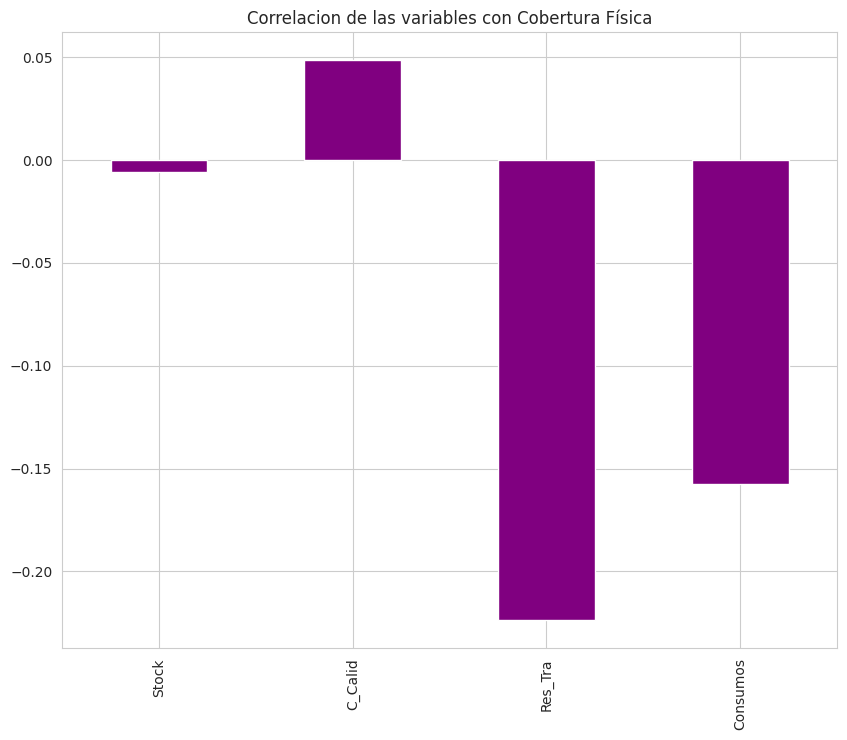

In [ ]:
X.corrwith(dfnuevo.Cob_Fís).plot(kind='bar', grid=True, figsize=(10, 8)
, title="Correlacion de las variables con Cobertura Física",color="Purple");

Podemos observar que mientras las variables Control de calidad y Stock posee una relación directa, es decir, aumentan mi Cobertura física, las variales Reservas de Traslado y Consumos poseen relación indirecta , la disminuyen.

***DECISION TREE***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Crear el modelo de árbol de regresión
tree_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Entrenar el modelo de árbol de regresión
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predicciones en el conjunto de entrenamiento y prueba utilizando el árbol de regresión
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento
train_score = tree_regressor.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento: {:.4f}'.format(train_score))

Puntaje en conjunto de entrenamiento: 1.0000


Un puntaje de 1.0000 indica que el modelo puede explicar el 100% de la variabilidad en los datos de entrenamiento. Esto puede ser un signo de sobreajuste (overfitting) si el modelo no generaliza bien a datos no vistos, es decir, datos en los que no se entrenó.

In [ ]:
# Calcular y imprimir el puntaje de prueba
test_score = tree_regressor.score(X_test, y_test)
print('Puntaje en conjunto de prueba: {:.4f}'.format(test_score))

Puntaje en conjunto de prueba: 0.2193


Un puntaje de 0.2193 sugiere que el modelo explica aproximadamente el 21.93% de la variabilidad en los datos de prueba. En otras palabras, el modelo no está tan bien ajustado a los datos de prueba como lo está a los datos de entrenamiento, lo que podría ser un indicador de que el modelo está sobreajustado (overfitting) a los datos de entrenamiento y no generaliza bien a datos nuevos

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calcular métricas en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mostrar métricas
print("Métricas en el conjunto de entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R^2:", train_r2)
print("\nMétricas en el conjunto de prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)

Métricas en el conjunto de entrenamiento:
MSE: 0.0
MAE: 0.0
R^2: 1.0

Métricas en el conjunto de prueba:
MSE: 9.651696966302481
MAE: 2.072925954440503
R^2: 0.2193116772113285


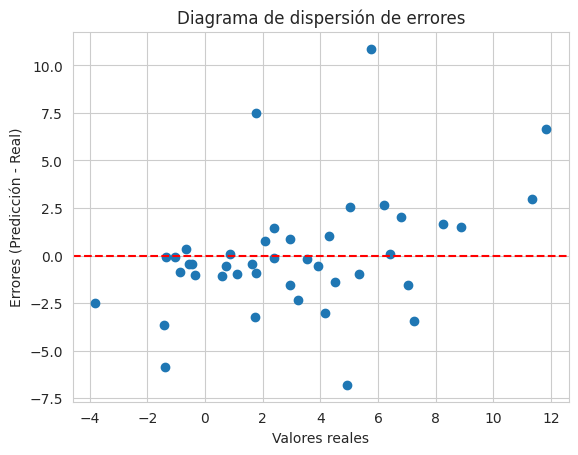

In [ ]:
import matplotlib.pyplot as plt

# Calcular los errores en el conjunto de prueba
errors = y_test - y_test_pred

# Dibujar un diagrama de dispersión de errores
plt.scatter(y_test, errors)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**RANDOM FOREST**

In [ ]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento
train_score = rf_model.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento: {:.4f}'.format(train_score))

Puntaje en conjunto de entrenamiento: 0.9632


Un puntaje en conjunto de entrenamiento de 0.9632 significa que el modelo Random Forest explica aproximadamente el 96.32% de la variabilidad en los datos de entrenamiento. Esto sugiere que el modelo ha aprendido bien los patrones presentes en los datos de entrenamiento y es capaz de predecir con precisión las respuestas en estos datos

In [ ]:
# Calcular y imprimir el puntaje de prueba
test_score = rf_model.score(X_test, y_test)
print('Puntaje en conjunto de prueba: {:.4f}'.format(test_score))

Puntaje en conjunto de prueba: 0.7436


Un puntaje en conjunto de prueba de 0.7436 significa que el modelo Random Forest explica aproximadamente el 74.36% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene un buen rendimiento en los datos de prueba, pero puede haber una ligera discrepancia entre el rendimiento en los datos de entrenamiento y los datos de prueba, lo que es común en la mayoría de los modelos

In [ ]:
# Calcular métricas en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
# Calcular métricas en el conjunto de prueba
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [ ]:
# Mostrar métricas
print("Métricas en el conjunto de entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R^2:", train_r2)
print("\nMétricas en el conjunto de prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)

Métricas en el conjunto de entrenamiento:
MSE: 0.4377898095517397
MAE: 0.4573657834706404
R^2: 0.963188770605436

Métricas en el conjunto de prueba:
MSE: 3.1698280618415215
MAE: 1.2898453441822118
R^2: 0.7436049057727981


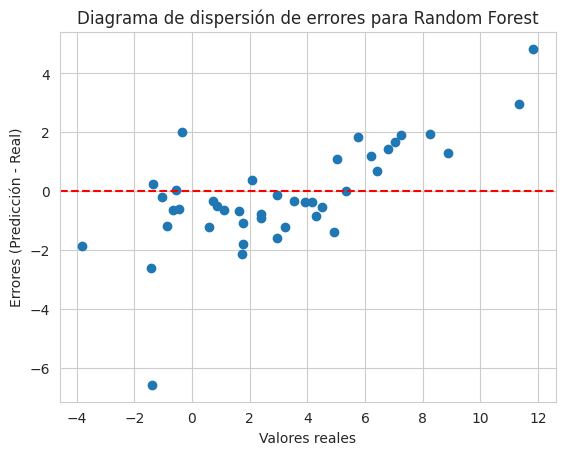

In [ ]:
# Calcular los errores en el conjunto de prueba
errors = y_test - y_test_pred

# Dibujar un diagrama de dispersión de errores
plt.scatter(y_test, errors)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para Random Forest")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**SUPPORT VECTOR REGRESSION (SVR)**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Escalar las características para SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear el modelo SVR
svr_model = SVR(kernel='rbf')  # Puedes experimentar con diferentes kernels (por ejemplo, 'linear', 'poly', 'rbf')

In [ ]:
# Entrenar el modelo
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento para SVR
train_score_svr = svr_model.score(X_train_scaled, y_train)
print('Puntaje en conjunto de entrenamiento (SVR): {:.4f}'.format(train_score_svr))

Puntaje en conjunto de entrenamiento (SVR): 0.1412


El modelo SVR explica aproximadamente el 14.12% de la variabilidad en los datos de entrenamiento. Esto sugiere que el modelo SVR no se ajusta muy bien a los datos de entrenamiento y no es capaz de predecir con precisión las respuestas en estos datos.

In [ ]:
# Calcular y imprimir el puntaje de prueba para SVR
test_score_svr = svr_model.score(X_test_scaled, y_test)
print('Puntaje en conjunto de prueba (SVR): {:.4f}'.format(test_score_svr))

Puntaje en conjunto de prueba (SVR): 0.0635


El modelo SVR explica aproximadamente el 6.35% de la variabilidad en los datos de prueba. Esto sugiere que el modelo SVR no generaliza bien a datos nuevos y no es capaz de predecir con precisión las respuestas en estos datos.

In [ ]:
# Calcular métricas de evaluación para el conjunto de entrenamiento
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)

In [ ]:
# Calcular métricas de evaluación para el conjunto de prueba
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

In [ ]:
# Imprimir resultados
print('SVR - MSE sobre el set de entrenamiento:', train_mse_svr)
print('SVR - R² sobre el set de entrenamiento:', train_r2_svr)
print('SVR - MSE sobre el set de evaluación:', test_mse_svr)
print('SVR - R² sobre el set de evaluación:', test_r2_svr)

SVR - MSE sobre el set de entrenamiento: 10.213329142881545
SVR - R² sobre el set de entrenamiento: 0.1412198416729803
SVR - MSE sobre el set de evaluación: 11.577517437520251
SVR - R² sobre el set de evaluación: 0.06353953072597718


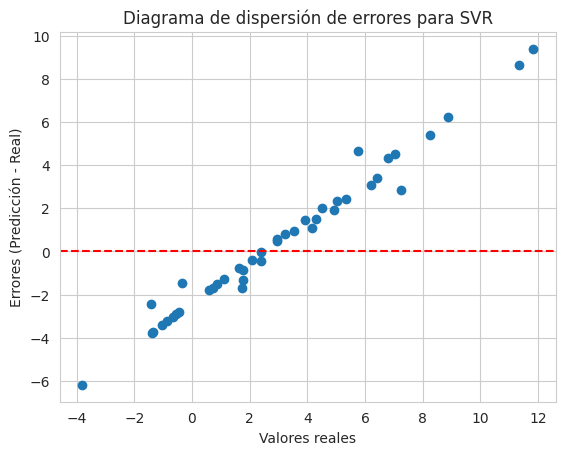

In [ ]:
# Calcular los errores en el conjunto de prueba para SVR
errors_svr = y_test - y_test_pred_svr

# Dibujar un diagrama de dispersión de errores para SVR
plt.scatter(y_test, errors_svr)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para SVR")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**GRADIENT BOOSTING REGRESSION**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Crear el modelo de Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
# Entrenar el modelo
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predicción en datos de entrenamiento y prueba
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

In [ ]:
# Calcular y imprimir el puntaje de entrenamiento para Gradient Boosting Regression
train_score_gbr = gbr_model.score(X_train, y_train)
print('Puntaje en conjunto de entrenamiento (GBR): {:.4f}'.format(train_score_gbr))

Puntaje en conjunto de entrenamiento (GBR): 0.9812


El puntaje en conjunto de entrenamiento de 0.9812 significa que el modelo GBR explica aproximadamente el 98.12% de la variabilidad en los datos de entrenamiento. Esto sugiere que el modelo GBR se ajusta muy bien a los datos de entrenamiento y es capaz de predecir con precisión las respuestas en estos datos

In [ ]:
# Calcular y imprimir el puntaje de prueba para Gradient Boosting Regression
test_score_gbr = gbr_model.score(X_test, y_test)
print('Puntaje en conjunto de prueba (GBR): {:.4f}'.format(test_score_gbr))

Puntaje en conjunto de prueba (GBR): 0.7925


Un puntaje en conjunto de prueba de 0.7925 significa que el modelo GBR explica aproximadamente el 79.25% de la variabilidad en los datos de prueba. Esto sugiere que el modelo GBR generaliza bastante bien a datos nuevos y es capaz de predecir con precisión las respuestas en estos datos.

In [ ]:
# Calcular métricas de evaluación para el conjunto de entrenamiento
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

In [ ]:
# Calcular métricas de evaluación para el conjunto de prueba
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

In [ ]:
# Imprimir resultados
print('Gradient Boosting Regression - MSE sobre el set de entrenamiento:', train_mse_gbr)
print('Gradient Boosting Regression - R² sobre el set de entrenamiento:', train_r2_gbr)
print('Gradient Boosting Regression - MSE sobre el set de evaluación:', test_mse_gbr)
print('Gradient Boosting Regression - R² sobre el set de evaluación:', test_r2_gbr)

Gradient Boosting Regression - MSE sobre el set de entrenamiento: 0.22356891778822044
Gradient Boosting Regression - R² sobre el set de entrenamiento: 0.9812013744069938
Gradient Boosting Regression - MSE sobre el set de evaluación: 2.565166498154851
Gradient Boosting Regression - R² sobre el set de evaluación: 0.7925136338086477


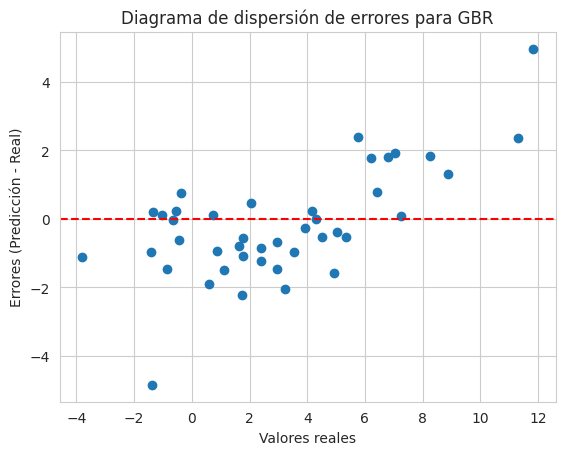

In [ ]:
# Calcular los errores en el conjunto de prueba para GBR
errors_gbr = y_test - y_test_pred_gbr

# Dibujar un diagrama de dispersión de errores para GBR
plt.scatter(y_test, errors_gbr)
plt.xlabel("Valores reales")
plt.ylabel("Errores (Predicción - Real)")
plt.title("Diagrama de dispersión de errores para GBR")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para indicar errores cero
plt.show()

**Conclusiones**

**Sobreajuste vs. Generalización:**

El Decession Tree y Random Forest muestran un rendimiento muy alto en el conjunto de entrenamiento, con puntajes de 1.0000 y 0.9632 respectivamente. Sin embargo, en el conjunto de prueba, el rendimiento es mucho más bajo, con puntajes de 0.2193 para ambos modelos. Esto sugiere un posible sobreajuste, donde los modelos se ajustan demasiado a los datos de entrenamiento y tienen dificultades para generalizar a datos nuevos.


El modelo SVR tiene un rendimiento aún peor, con puntajes muy bajos en ambos conjuntos (0.1412 en entrenamiento y 0.0635 en prueba). Esto sugiere que el modelo no está capturando bien la relación entre las características y la variable objetivo.


Por otro lado, el modelo GBR muestra un rendimiento sólido tanto en el conjunto de entrenamiento como en el de prueba, con puntajes de 0.9812 y 0.7925 respectivamente. Esto sugiere que el modelo generaliza bien a datos nuevos y puede estar realizando una mejor captura de la estructura subyacente de los datos.

**Métricas de Error:**

El MSE y el MAE son más altos para los modelos que muestran un rendimiento deficiente en el conjunto de prueba. Para el Decission Tree y Random Forest, estos valores son 3.1698 y 1.2898 respectivamente, indicando que estos modelos están cometiendo mayores errores en las predicciones.


El R^2 es una medida de qué tan bien el modelo se ajusta a los datos. Los modelos con puntajes más altos en el conjunto de prueba tienen un mejor ajuste a los datos.

**Selección del Modelo:**

Basado en los resultados, parece que el modelo GBR es el más adecuado para este problema en particular, ya que tiene un buen rendimiento tanto en el conjunto de entrenamiento como en el d-e prueba y parece generalizar bien a nuevos datos.


Los modelos de Decission Tree y Rabndom Forest podrían estar sobreajustados, mientras que SVR muestra un rendimiento deficiente en general.

Al abordar la pregunta "¿predecir la cobertura física de cada material de la compañía?", los resultados de los modelos proporcionan una guía útil. Mientras que los modelos de Decission Tree y Random Forest muestran un rendimiento alto en el conjunto de entrenamiento pero baja generalización en el conjunto de prueba, lo que sugiere un posible sobreajuste, el modelo SVR no logra capturar adecuadamente la relación entre las características y la variable objetivo. Sin embargo, el modelo GBR destaca al demostrar un rendimiento sólido tanto en el conjunto de entrenamiento como en el de prueba. Por lo tanto, para abordar eficazmente la predicción de la cobertura física de los materiales de la compañía, se recomienda utilizar el modelo GBR, que muestra una buena capacidad de generalización a nuevos datos y puede capturar la estructura subyacente de los datos con mayor precisión.